In [1]:
import cmocean.cm as cm
import copy
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import matplotlib.gridspec as gridspec
import pandas as pd
from matplotlib.colors import LogNorm
from matplotlib.colors import ListedColormap

In [2]:
#data = xr.open_dataset('/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_5_days.zarr')
#data = xr.open_dataset('/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_20_days.zarr')
#data = xr.open_dataset('/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0172022_run_60_days.zarr')
#filename = '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_365_days.zarr'
#filename = '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_60_days.zarr'
#filename = '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_90_days.zarr'
#filename = '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_60_days_no_buried.zarr'
#filename = '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_180_days_no_buried_tau_crit_5e-4_upwards_from_bottom_added.zarr'
#filename = '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_365_days_no_buried_tau_crit_5e-4_upwards_from_bottom_added.zarr'
#filename = '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_365_days_no_buried_tau_crit_1e-2_upwards_updated_added.zarr'
filename = '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_365_days_no_buried_tau_crit_1e-2_upwards_testing.zarr'
data = xr.open_dataset(filename)
#
nobs = data.obs.shape[0]
ntraj = data.trajectory.shape[0]
data

/home/vvalenzuela/conda_envs/Parcels/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/home/vvalenzuela/conda_envs/Parcels/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


<xarray.Dataset> Size: 35MB
Dimensions:       (trajectory: 360, obs: 2190)
Coordinates:
  * obs           (obs) int32 9kB 0 1 2 3 4 5 ... 2184 2185 2186 2187 2188 2189
  * trajectory    (trajectory) int64 3kB 0 1 2 3 4 5 ... 354 355 356 357 358 359
Data variables:
    fact          (trajectory, obs) float32 3MB ...
    lat           (trajectory, obs) float64 6MB ...
    lon           (trajectory, obs) float64 6MB ...
    release_time  (trajectory, obs) float32 3MB ...
    status        (trajectory, obs) float32 3MB ...
    time          (trajectory, obs) datetime64[ns] 6MB ...
    z             (trajectory, obs) float64 6MB ...
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_kernels:        MPParticlePBDEs_statesSinkingAdvectionturb_mixres...
    parcels_mesh:           spherical
    parcels_version:        3.1.2

PBDE Simulation (newest code by Susan) analysis :D

In [3]:
print (nobs, ntraj)

2190 360


# REGIONAL ANALYSIS

In [3]:
import Regions_functions_V2
from Regions_functions_V2 import vertical_mean_total_profiles, vertical_status_profiles, plot_vertical_total_state_profiles, plot_vertical_state_status

/tmp/ipykernel_1111431/3669761077.py:34: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax.pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0][0], cmap = cmap)


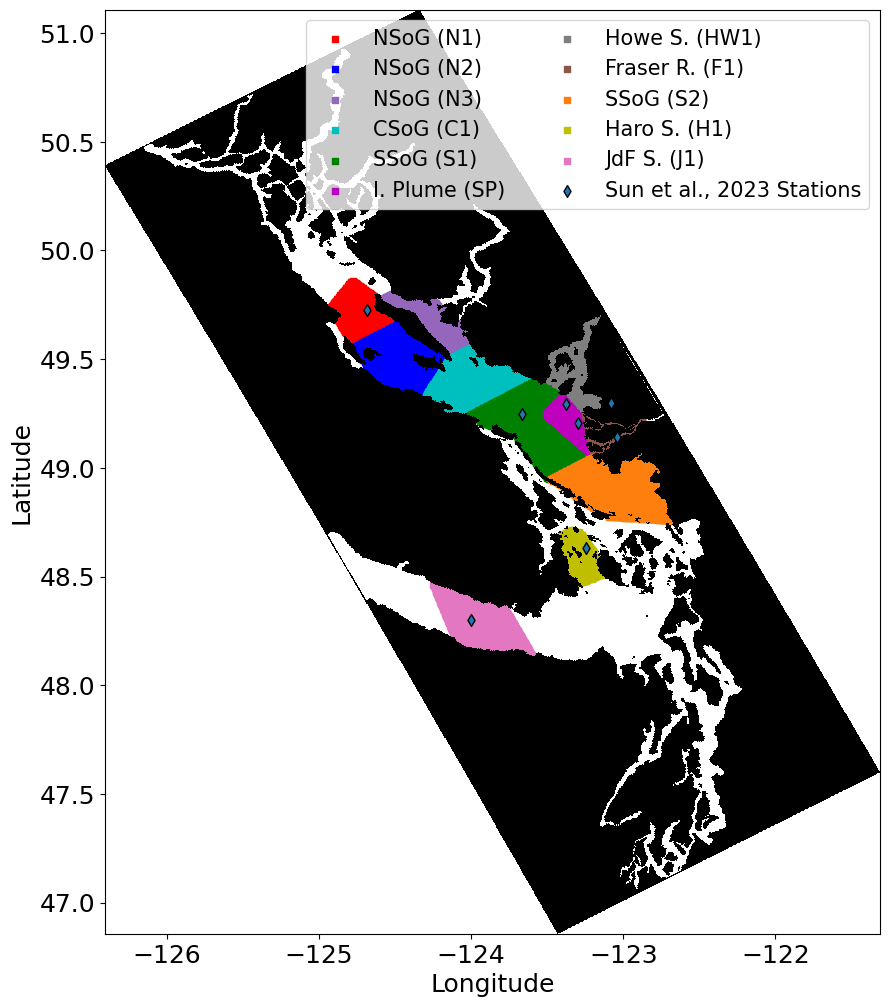

In [4]:
lon_NSoG_N1, lat_NSoG_N1 = Regions_functions_V2.lon_NSoG_N1, Regions_functions_V2.lat_NSoG_N1
lon_NSoG_N2, lat_NSoG_N2 = Regions_functions_V2.lon_NSoG_N2, Regions_functions_V2.lat_NSoG_N2
lon_NSoG_N3, lat_NSoG_N3 = Regions_functions_V2.lon_NSoG_N3, Regions_functions_V2.lat_NSoG_N3
lon_CSoG_C1, lat_CSoG_C1 = Regions_functions_V2.lon_CSoG_C1, Regions_functions_V2.lat_CSoG_C1
lon_SSoG_S1, lat_SSoG_S1 = Regions_functions_V2.lon_SSoG_S1, Regions_functions_V2.lat_SSoG_S1
lon_SSoG_SP, lat_SSoG_SP = Regions_functions_V2.lon_SSoG_SP, Regions_functions_V2.lat_SSoG_SP
lon_SSoG_S2, lat_SSoG_S2 = Regions_functions_V2.lon_SSoG_S2, Regions_functions_V2.lat_SSoG_S2
lon_Haro_H1, lat_Haro_H1 = Regions_functions_V2.lon_Haro_H1, Regions_functions_V2.lat_Haro_H1
lon_Juan_J1, lat_Juan_J1 = Regions_functions_V2.lon_Juan_J1, Regions_functions_V2.lat_Juan_J1
lon_Fraser_F1, lat_Fraser_F1 = Regions_functions_V2.lon_Fraser_F1, Regions_functions_V2.lat_Fraser_F1
lon_Howe_HW1, lat_Howe_HW1 = Regions_functions_V2.lon_Howe_HW1, Regions_functions_V2.lat_Howe_HW1
#########
colors_regions = ['r', 'b', 'tab:purple', 'c', 'g','m', 'tab:gray','tab:brown', 'tab:orange', 'y', 'tab:pink']
regions = ['NSoG (N1)', 'NSoG (N2)',  'NSoG (N3)', 'CSoG (C1)', 'SSoG (S1)', 'I. Plume (SP)', 'Howe S. (HW1)', 'Fraser R. (F1)', 'SSoG (S2)', 'Haro S. (H1)', 'JdF S. (J1)']
coords = xr.open_dataset('/ocean/vvalenzuela/MOAD/grid/coordinates_seagrid_SalishSea201702.nc', decode_times=False)
mask = xr.open_dataset('/ocean/vvalenzuela/MOAD/grid2/mesh_mask202108_TDV.nc')
bathy = xr.open_dataset('/ocean/vvalenzuela/MOAD/grid/bathymetry_202108.nc')
colors = [(0, 0, 0, 1),  # Black for land (1)
          (0, 0, 0, 0)]  # Transparent for water (0)
cmap = ListedColormap(colors)
plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(figsize = (10,12))
ax.scatter(lon_NSoG_N1, lat_NSoG_N1, c = colors_regions[0], s = 20, marker = 's', label=regions[0])
ax.scatter(lon_NSoG_N2, lat_NSoG_N2, c = colors_regions[1],s = 20,  marker = 's', label=regions[1])
ax.scatter(lon_NSoG_N3, lat_NSoG_N3, c = colors_regions[2],s = 20,  marker = 's', label=regions[2])
ax.scatter(lon_CSoG_C1, lat_CSoG_C1, c = colors_regions[3],s = 20, marker = 's', label=regions[3])
ax.scatter(lon_SSoG_S1, lat_SSoG_S1, c = colors_regions[4],s = 20, marker = 's', label=regions[4])
ax.scatter(lon_SSoG_SP, lat_SSoG_SP, c = colors_regions[5],s = 20, marker = 's', label=regions[5])
ax.scatter(lon_Howe_HW1, lat_Howe_HW1,c = colors_regions[6], s = 20, marker = 's', label=regions[6])
ax.scatter(lon_Fraser_F1, lat_Fraser_F1, c = colors_regions[7], s = 20, marker = 's',label=regions[7])
ax.scatter(lon_SSoG_S2, lat_SSoG_S2,c = colors_regions[8], s = 20 ,marker = 's', label=regions[8])
ax.scatter(lon_Haro_H1, lat_Haro_H1,c = colors_regions[9],s = 20,marker = 's', label=regions[9])
ax.scatter(lon_Juan_J1, lat_Juan_J1, c = colors_regions[10],s = 20,marker = 's', label=regions[10])
ax.pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0][0], cmap = cmap)
#
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
#
stations = ['JF2', 'HS', 'S4-1.5', 'S2', 'NG', 'S1', 'S3', 'FR']
lat = np.array([48 + (18/60), 48 + (37.80/60) , 49 + (15/60) , 49 + (17.58/60) , 49 + (43.60/60), 49 + (12.32/60), 49 + (17.88/60), 49 + (08.66/60)])
lon = (-1) * np.array([124, 123 + (14.60/60), 123 + (40/60), 123 + (22.51/60), 124 + (40.80/60), 123 + (18/60), 123 + (04.91/60), 123 + (02.65/60)]) 
ax.scatter(lon, lat, marker = 'd', edgecolor = 'k', label = 'Sun et al., 2023 Stations')
#
ax.legend(loc = 'upper right', fontsize = 15, ncol = 2)

/tmp/ipykernel_1111431/3791850203.py:2: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax.pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0][0], cmap = cmap)


NameError: name 'clon' is not defined

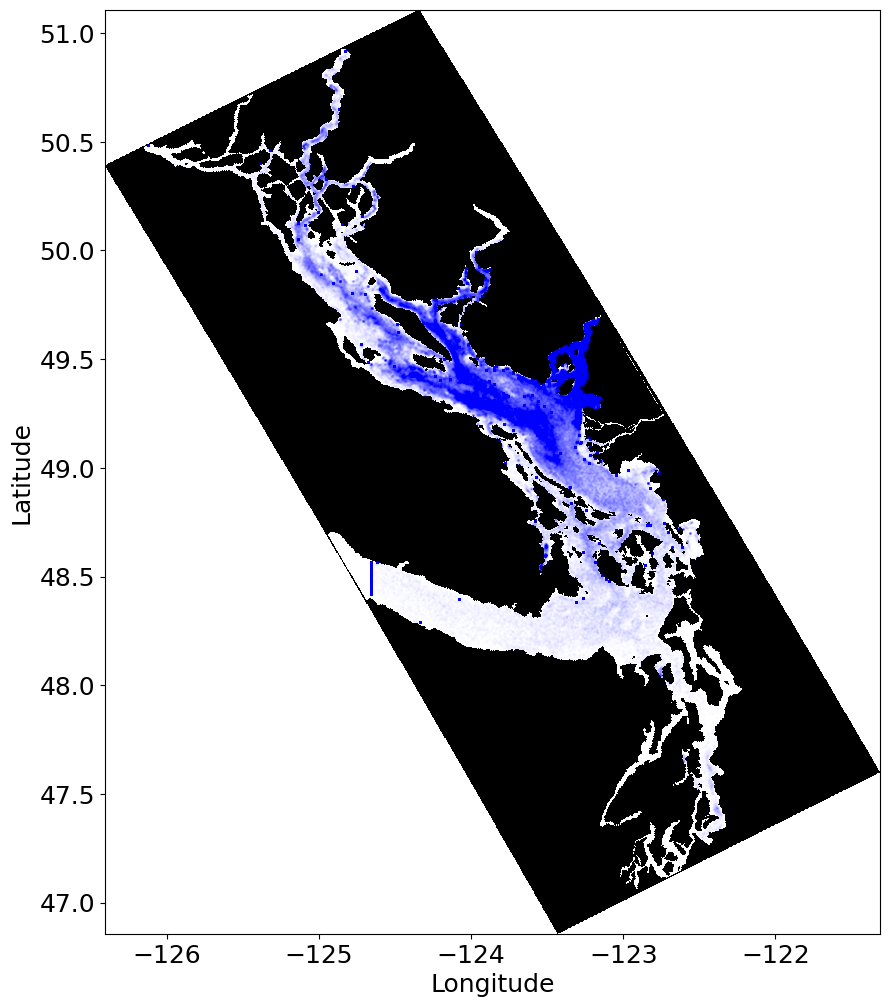

In [5]:
fig, ax = plt.subplots(figsize = (10,12))
ax.pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0][0], cmap = cmap)
ax.scatter(data.lon, data.lat, c ='b', alpha = .009, s = 1)
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.scatter(clon,clat, c = 'r', marker = '*', label = 'Iona Outfall')
ax.legend()

In [7]:
polygon_dict = Regions_functions_V2.polygon_definition(filename)

In [8]:
_ , vertical_N1_total = vertical_mean_total_profiles(polygon_dict['N1'], 80)
_ , vertical_N2_total = vertical_mean_total_profiles(polygon_dict['N2'], 80)
_ , vertical_N3_total = vertical_mean_total_profiles(polygon_dict['N3'], 80)
_ , vertical_C1_total = vertical_mean_total_profiles(polygon_dict['C1'], 80)
_ , vertical_S1_total = vertical_mean_total_profiles(polygon_dict['S1'], 80)
_ , vertical_SP_total = vertical_mean_total_profiles(polygon_dict['SP'], 80)
_ , vertical_HW1_total = vertical_mean_total_profiles(polygon_dict['HW1'], 80)
_ , vertical_F1_total = vertical_mean_total_profiles(polygon_dict['F1'], 80)
_ , vertical_S2_total = vertical_mean_total_profiles(polygon_dict['S2'], 80)
_ , vertical_H1_total = vertical_mean_total_profiles(polygon_dict['H1'], 80)
_ , vertical_J1_total = vertical_mean_total_profiles(polygon_dict['J1'], 80)
####################### Status ###############################################
status_vertical_N1 = vertical_status_profiles(polygon_dict['N1'], 80)
status_vertical_N2 = vertical_status_profiles(polygon_dict['N2'], 80)
status_vertical_N3 = vertical_status_profiles(polygon_dict['N3'], 80)
status_vertical_C1 = vertical_status_profiles(polygon_dict['C1'], 80)
status_vertical_S1 = vertical_status_profiles(polygon_dict['S1'], 80)
status_vertical_SP = vertical_status_profiles(polygon_dict['SP'], 80)
status_vertical_HW1 = vertical_status_profiles(polygon_dict['HW1'], 80)
status_vertical_F1 = vertical_status_profiles(polygon_dict['F1'], 80)
status_vertical_S2 = vertical_status_profiles(polygon_dict['S2'], 80)
status_vertical_H1 = vertical_status_profiles(polygon_dict['H1'], 80)
status_vertical_J1 = vertical_status_profiles(polygon_dict['J1'], 80)


In [9]:
perfiles_vertical_total = [vertical_N1_total, vertical_N2_total, vertical_N3_total, vertical_C1_total, vertical_S1_total, vertical_SP_total
                          , vertical_HW1_total, vertical_F1_total, vertical_S2_total, vertical_H1_total, vertical_J1_total]
###################### Status #########################
status_profiles = [status_vertical_N1, status_vertical_N2, status_vertical_N3, status_vertical_C1
                   , status_vertical_S1, status_vertical_SP, status_vertical_HW1, status_vertical_F1, 
                   status_vertical_S2, status_vertical_H1, status_vertical_J1]

Status sedimented and watercolumn exlusively per region

In [10]:
regions_water, regions_sedimented = Regions_functions_V2.status_states_regions_map(polygon_dict)
####### regions ########
# written like N1_sedimented_lon, N1_sedimented_lat 
#
region_names = ['N1', 'N2', 'N3', 'C1', 'S1', 'SP', 'HW1', 'F1', 'S2', 'H1', 'J1']

water_regions_lon = [regions_water[region]['lon'] for region in region_names]
water_regions_lat = [regions_water[region]['lat'] for region in region_names]
water_regions_depth = [regions_water[region]['depth'] for region in region_names]

sedimented_regions_lon = [regions_sedimented[region]['lon'] for region in region_names]
sedimented_regions_lat = [regions_sedimented[region]['lat'] for region in region_names]
sedimented_regions_depth = [regions_sedimented[region]['depth'] for region in region_names]


In [11]:
sum_water_N1 = status_vertical_N1['Particles Status 2'].sum() + status_vertical_N1['Particles Status 3'].sum()
sum_water_S1 = status_vertical_S1['Particles Status 2'].sum() + status_vertical_S1['Particles Status 3'].sum()
ratio_N1_S1 = sum_water_N1 / sum_water_S1
print(ratio_N1_S1)

0.14084507042253522


As the results shown by Sun et. al (2023), the K_scav constant got by the model agrees within the ranges of values obtained in the paper.

(particles_watercolumn_N1 / particles_watercolumn_S1) = 0.0324 for 60 days run

In the paper they got 0.038 +- 0.014 day $^{-1}$ ---> (NSoG / SSoG) / (60)

In [11]:
status_label = ['Particles Status 1', 'Particles Status 2', 'Particles Status 3', 'Particles Status 11', 'Particles Status 12', 'Particles Status 13', 'Particles Status 21', 'Particles Status 22', 'Particles Status 23']
states = ['Sewage Water', 'Colloidal Water', 'Marine Water', 'Sewage Sedimented', 'Colloidal Sedimented', 'Marine Sedimented', 'Sewage Buried', 'Colloidal Buried', 'Marine Buried']
colors = ['r', 'b', 'c', 'g', 'tab:orange', 'y', 'm', 'tab:brown', 'tab:gray']
regions = ['N1', 'N2', 'C1', 'S1','HW1', 'F1', 'S2', 'H1', 'J1']

/ocean/vvalenzuela/MOAD/analysis-vicente/Ocean_Parcels/PBDE_simulations/Regions_functions_V2.py:669: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax_map.pcolormesh(nav_lon, nav_lat, tmask, cmap=cmap, shading='auto')
/ocean/vvalenzuela/MOAD/analysis-vicente/Ocean_Parcels/PBDE_simulations/Regions_functions_V2.py:669: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax_map.pcolormesh(nav_lon, nav_lat, tmask, cmap=cmap, shading='auto')
/ocean/vvalenzuela/MOAD/analysis-vicente/Ocean_Parcels/PBDE_simulations/Regions_functions_V2.py:669: UserWarning: The input coordinates to pcolormesh are 

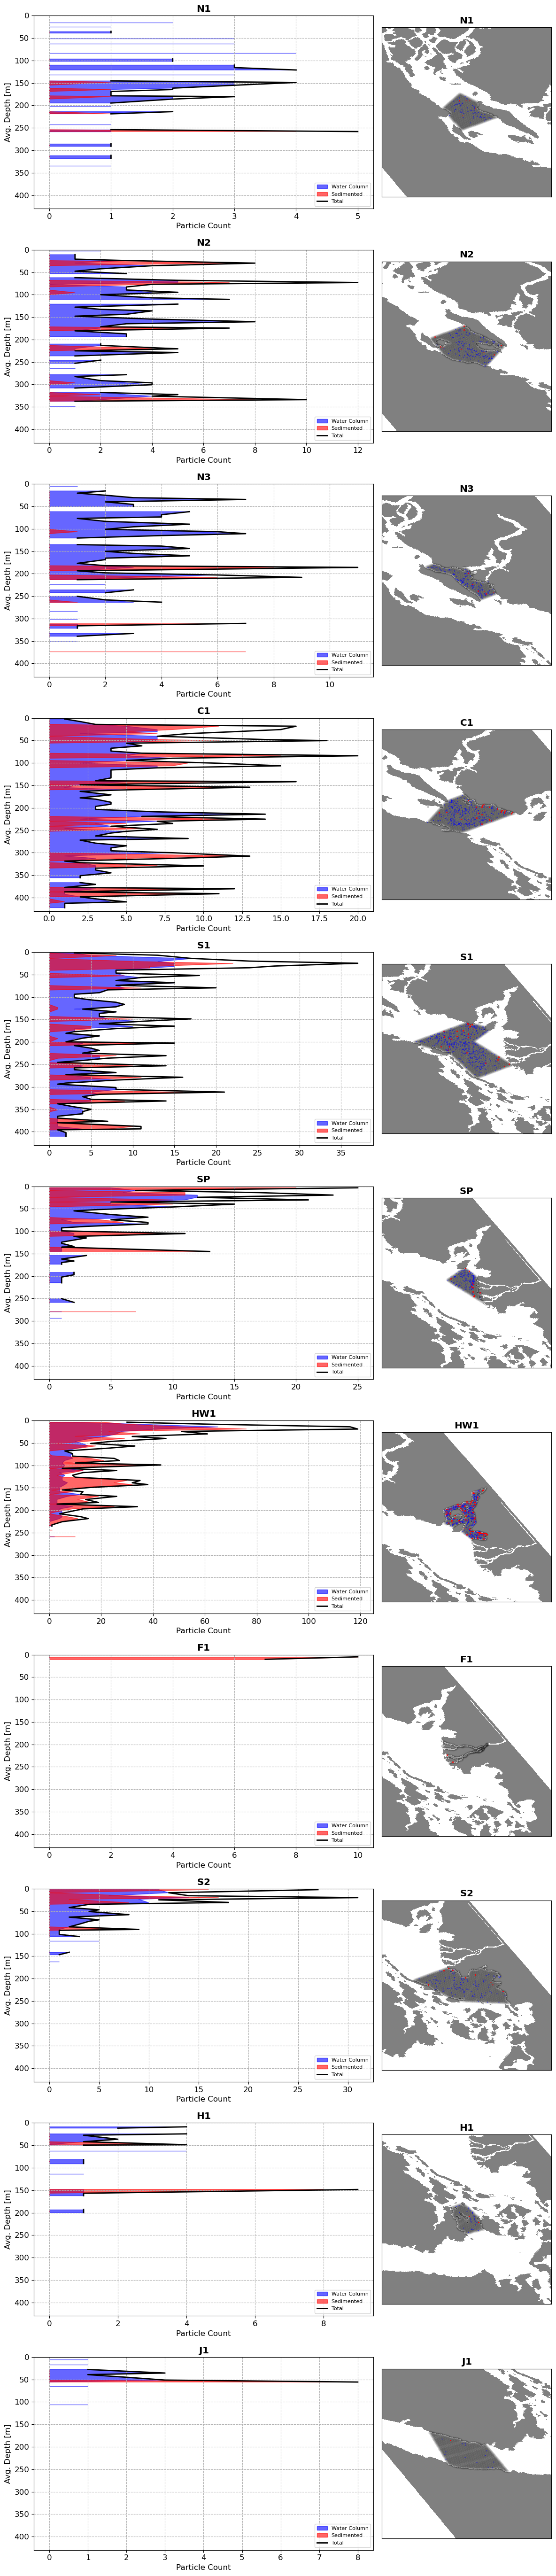

/tmp/ipykernel_1111431/2832796299.py:9: RuntimeWarning: Mean of empty slice
  mean_depths_region_water[i] = np.nanmean(water_regions_depth[i])


Text(0.5, 1.0, 'End of the month Mean Depth')

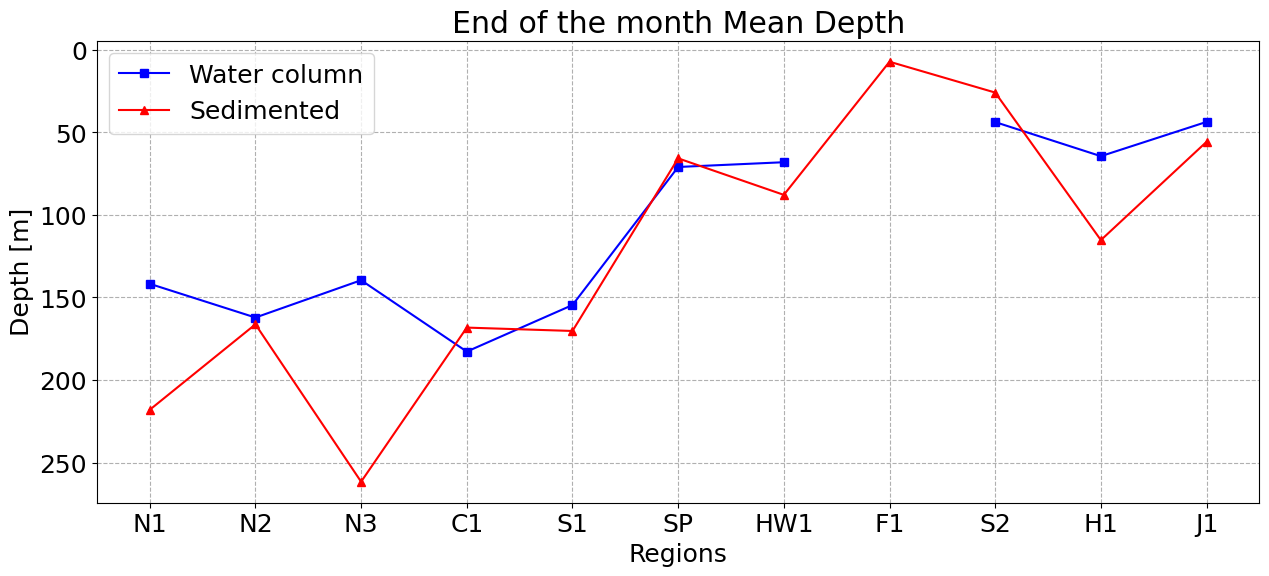

In [12]:
plot_vertical_total_state_profiles(perfiles_vertical_total, status_profiles,
                                   water_regions_lon, water_regions_lat,
                                   sedimented_regions_lon, sedimented_regions_lat, 
                                   water_regions_depth, sedimented_regions_depth)
###################################
mean_depths_region_water = np.zeros(len(region_names))
mean_depths_region_sediment = np.zeros(len(region_names))
for i in range(0,len(region_names)):
    mean_depths_region_water[i] = np.nanmean(water_regions_depth[i])
    mean_depths_region_sediment[i] = np.nanmean(sedimented_regions_depth[i])
############################################################################
plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(figsize = (15,6)) 
ax.plot(region_names,mean_depths_region_water, 's-b', label ='Water column')   
ax.plot(region_names,mean_depths_region_sediment, '^-r', label = 'Sedimented') 
ax.invert_yaxis() 
#
ax.legend(loc = 'upper left')
ax.grid(linestyle = '--')
ax.set_ylabel('Depth [m]')
ax.set_xlabel('Regions') 
ax.set_title('End of the month Mean Depth')

Vertical plots of every END OF THE MONTH particles showing the amount in the water column and in the sediment

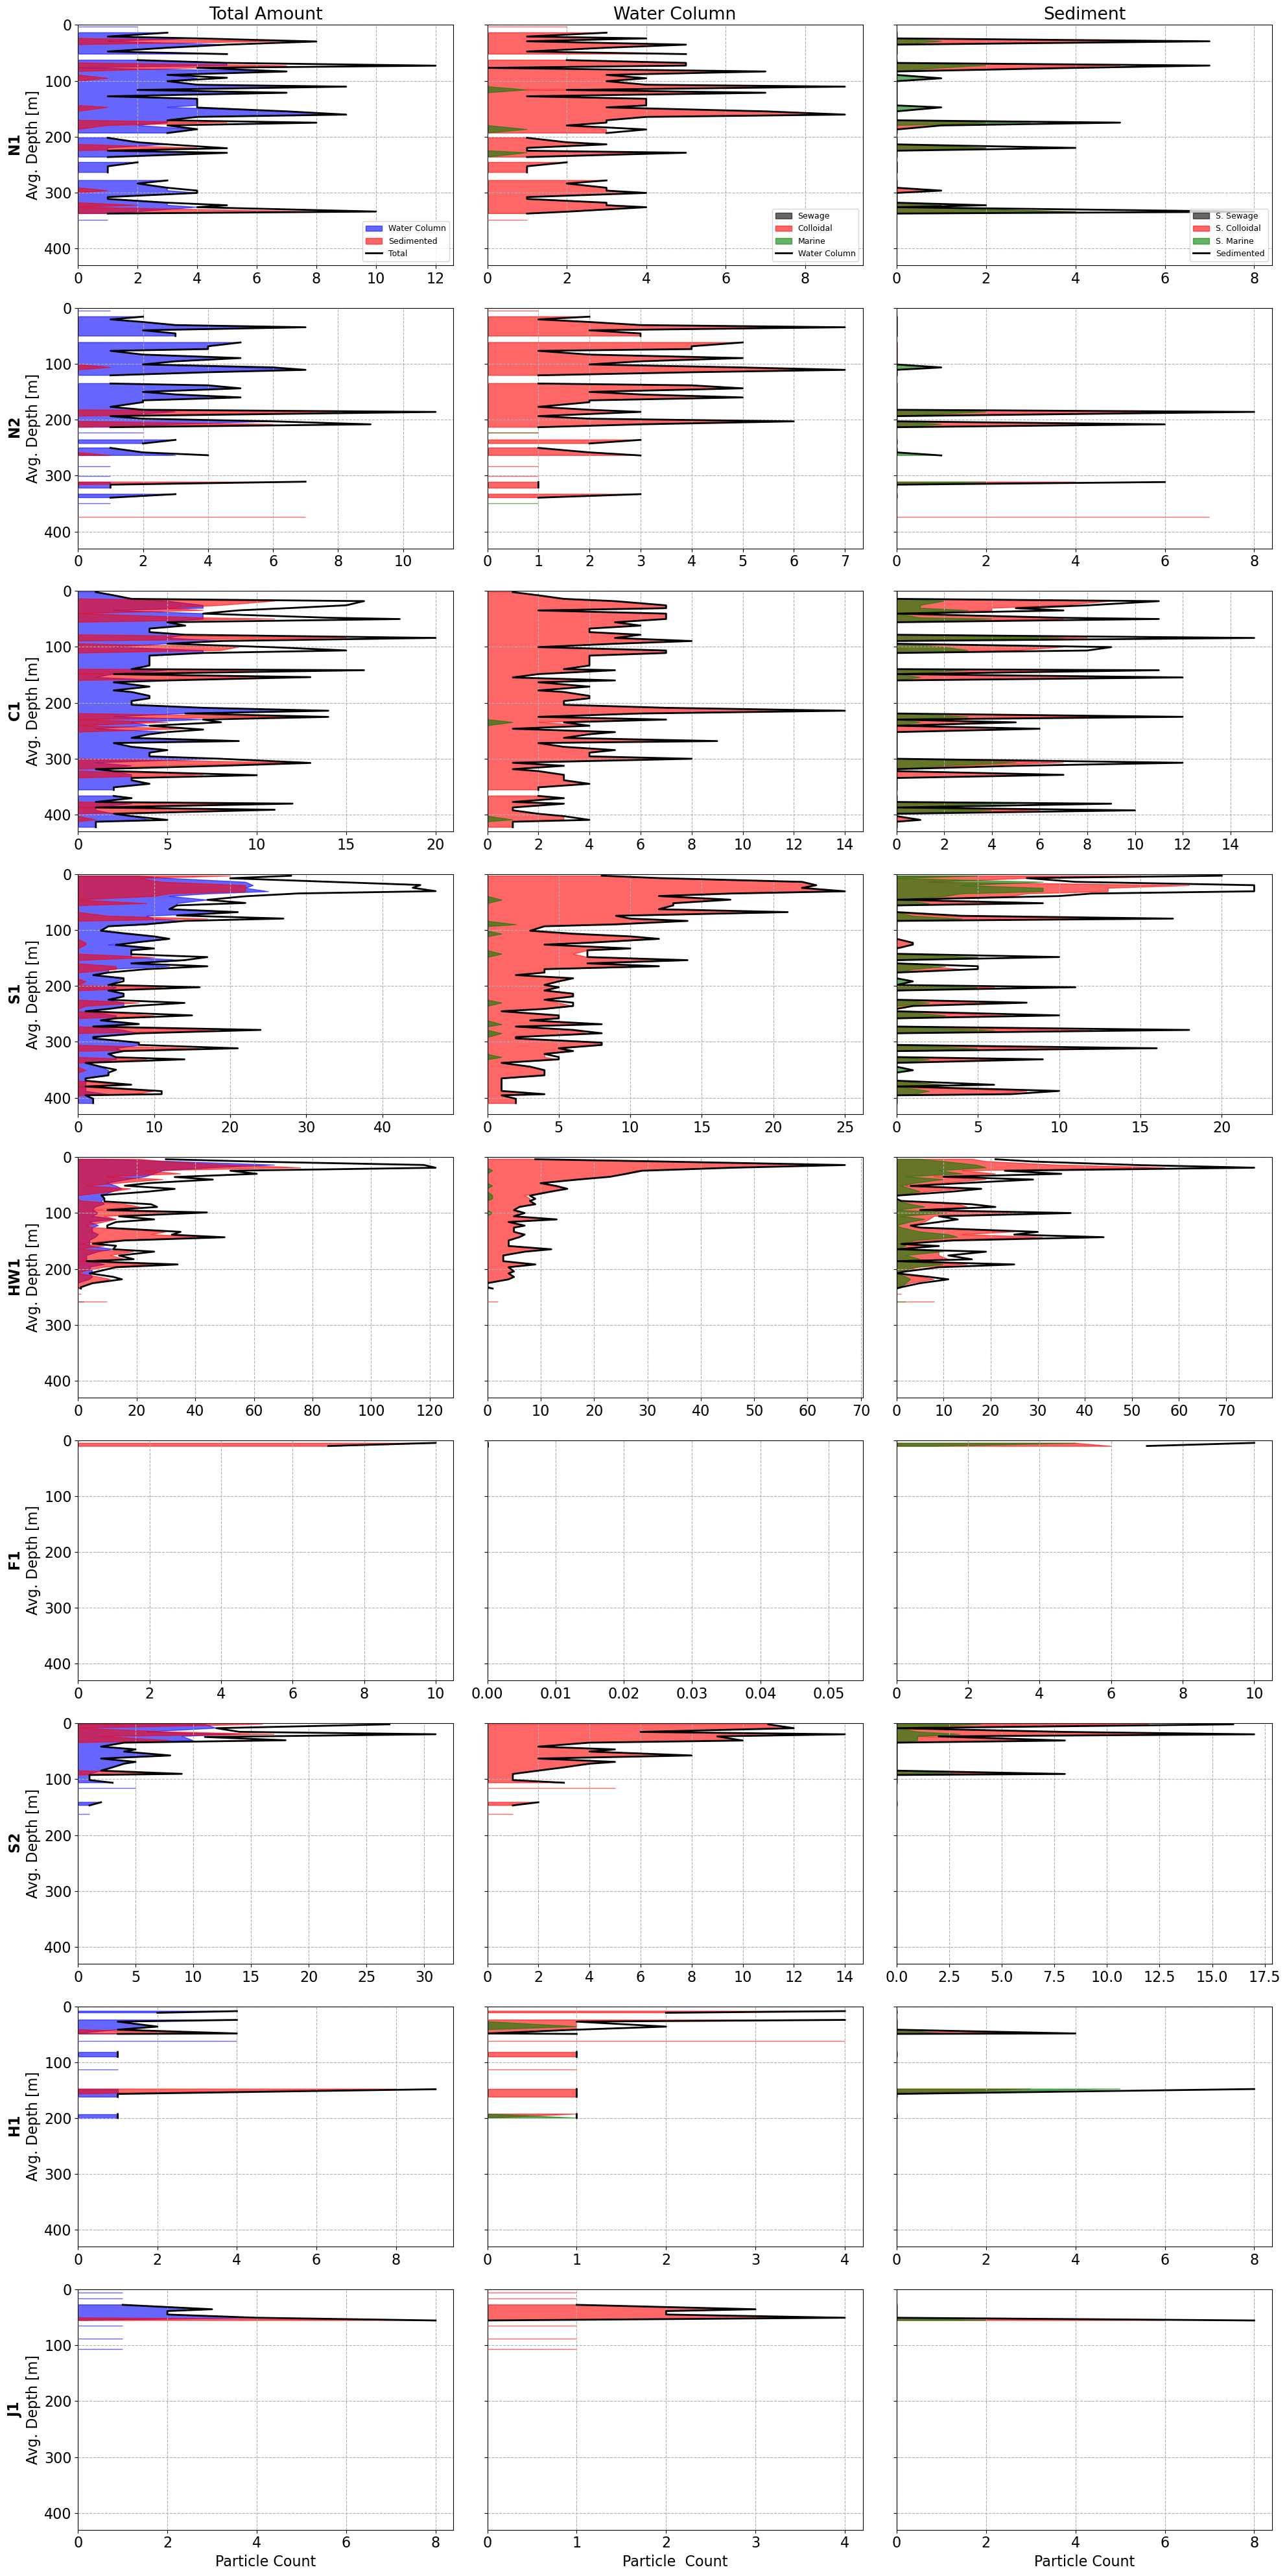

In [12]:
plot_vertical_state_status(perfiles_vertical_total, status_profiles)

What about the amount of particles per region vs time (sediment and water)?

In [53]:
def water_sediment_count(polygon, data, t):
    #
    _, _, _, status_inside, _ = Regions_functions_V2.points_inside(polygon, data, t)
    #
    water_status = [1, 2, 3]
    sediment_status = [11, 12, 13]
    #
    water_count = np.isin(status_inside, water_status).sum()
    sediment_count = np.isin(status_inside, sediment_status).sum()
    #
    return water_count, sediment_count


In [55]:
step = 10  
time_indices = np.arange(0, len(data.obs), step)
#
region_names = ['N1', 'N2', 'C1', 'S1', 'HW1', 'F1', 'S2', 'H1', 'J1']
water_dict = {}
sediment_dict = {}

for region in region_names:
    water_arr = np.zeros(len(time_indices))
    sediment_arr = np.zeros(len(time_indices))
    polygon = polygon_dict[region][0]
    
    for idx, t in enumerate(time_indices):
        water_arr[idx], sediment_arr[idx] = water_sediment_count(polygon, data, t)
    
    water_dict[region] = water_arr
    sediment_dict[region] = sediment_arr



In [132]:
def spreading_over_time_by_status(
    filename, source_lon, source_lat,
    tt_step=100, utm_epsg='EPSG:32610'
):
    from geopy.distance import geodesic
    from scipy.spatial import ConvexHull
    from pyproj import Transformer

    # Load dataset and variables
    data = xr.open_dataset(filename)
    lons = data.lon.values
    lats = data.lat.values
    status = data.status.values
    depth = data.z.values 
    time = data.time[0, :].values

    results_water = []
    results_sediment = []

    transformer = Transformer.from_crs("EPSG:4326", utm_epsg, always_xy=True)
    n_obs = lons.shape[1]

    for tt in range(0, n_obs, tt_step):
        for label, results_list, valid_status in [
            ("water", results_water, [1, 2, 3]),
            ("sediment", results_sediment, [11, 12, 13])
        ]:
            lon_t = lons[:, tt]
            lat_t = lats[:, tt]
            status_t = status[:, tt]
            depth_t = depth[:, tt]

            valid = (
                ~np.isnan(lon_t) &
                ~np.isnan(lat_t) &
                ~np.isnan(depth_t) &
                np.isin(status_t, valid_status)
            )
            if np.count_nonzero(valid) < 3:
                continue

            lon_t = lon_t[valid]
            lat_t = lat_t[valid]
            depth_t = depth_t[valid]

            # Distance from source (in km)
            distances_km = np.array([
                geodesic((source_lat, source_lon), (lat, lon)).km
                for lat, lon in zip(lat_t, lon_t)
            ])
            mean_dist = np.mean(distances_km)
            std_dist = np.std(distances_km)

            # UTM projection (in km)
            x_m, y_m = transformer.transform(lon_t, lat_t)
            x_km = np.array(x_m) / 1000
            y_km = np.array(y_m) / 1000

            var_x = np.var(x_km)
            var_y = np.var(y_km)

            # Convex hull
            coords = np.stack([x_km, y_km], axis=1)
            try:
                hull = ConvexHull(coords)
                hull_area = hull.volume
            except Exception:
                hull_area = np.nan

            mean_depth = np.mean(depth_t)

            results_list.append({
                'time': time[tt],
                'mean_distance_km': mean_dist,
                'std_distance_km': std_dist,
                'var_x_km2': var_x,
                'var_y_km2': var_y,
                'convex_hull_area_km2': hull_area,
                'mean_depth_m': mean_depth
            })

    df_water = pd.DataFrame(results_water).set_index('time')
    df_sediment = pd.DataFrame(results_sediment).set_index('time')
    return df_water, df_sediment


In [133]:
lat_source = 49.195045
lon_source = -123.301956
spread_water, spread_sediment = spreading_over_time_by_status(filename=filename,
                                  source_lon=lon_source, source_lat=lat_source, tt_step=1)

/home/vvalenzuela/conda_envs/Parcels/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/home/vvalenzuela/conda_envs/Parcels/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


In [138]:
spread_water.head()

mean_distance_km  std_distance_km  var_x_km2  var_y_km2  \
time                                                                           
2022-01-01 12:30:00          0.672235         0.235797   0.021598   0.141965   
2022-01-01 16:30:00          0.480565         0.215389   0.028466   0.122440   
2022-01-01 20:30:00          1.205757         0.264971   0.262390   0.105438   
2022-01-02 00:30:00          2.940177         0.553351   0.328789   0.416923   
2022-01-02 04:30:00          2.372168         1.947304   0.173964   4.818832   

                     convex_hull_area_km2  mean_depth_m  
time                                                     
2022-01-01 12:30:00              0.047597     74.600575  
2022-01-01 16:30:00              0.238083     65.476995  
2022-01-01 20:30:00              0.823935     76.241384  
2022-01-02 00:30:00              1.893549     72.886647  
2022-01-02 04:30:00              5.774843     69.367673

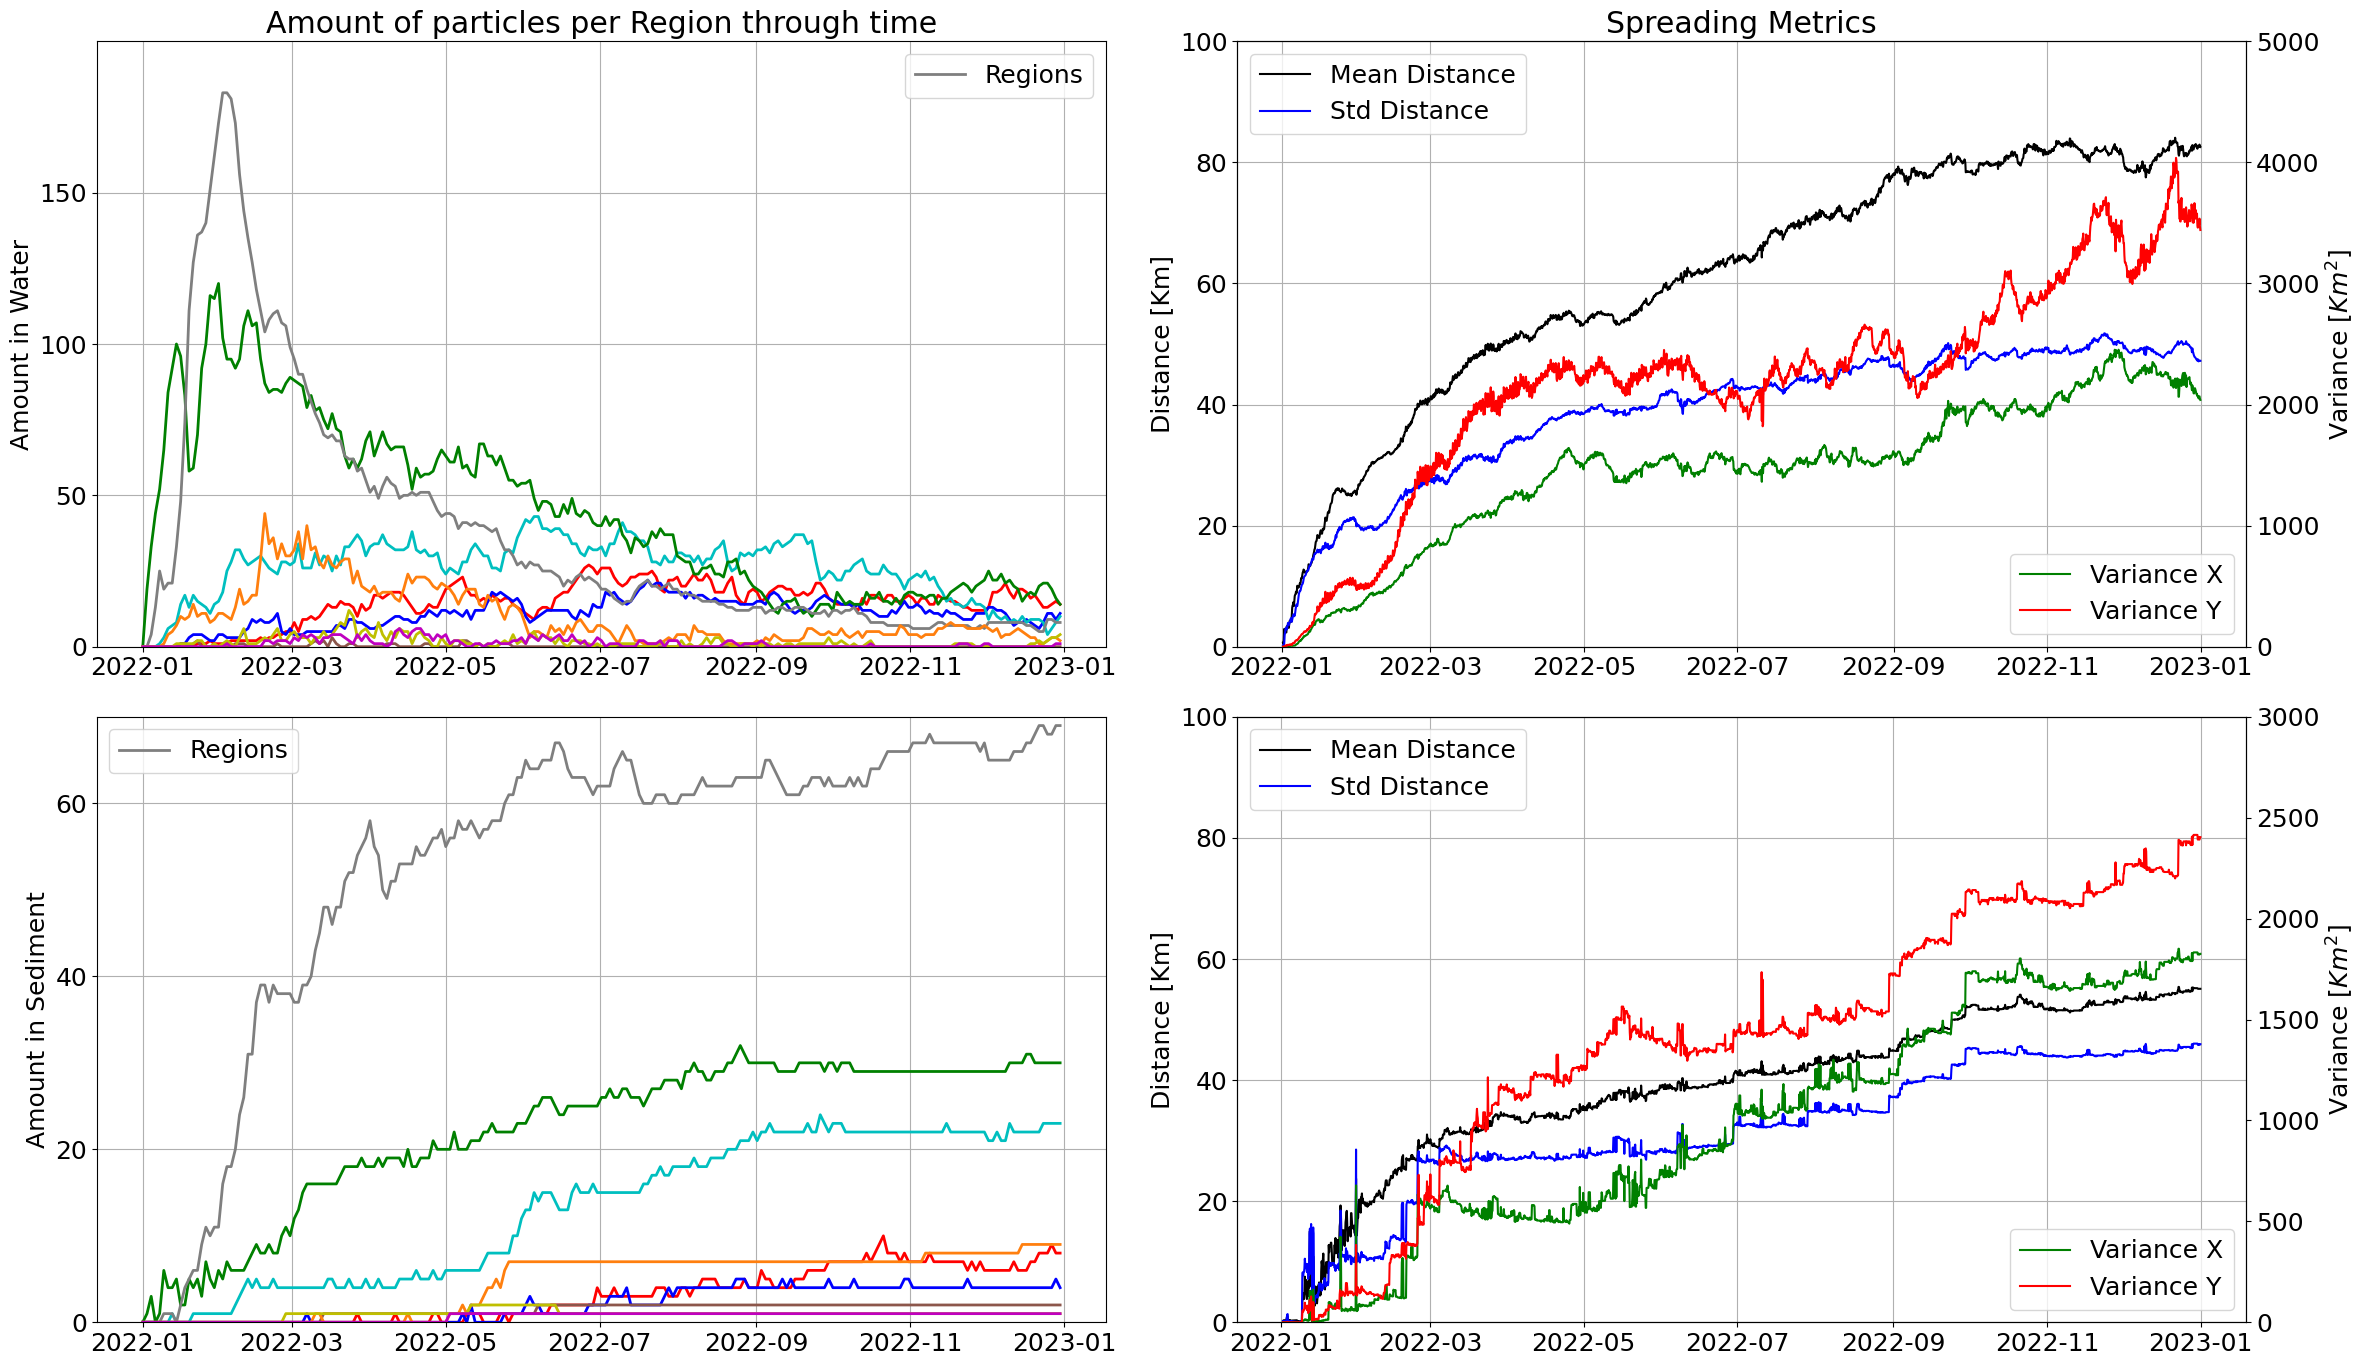

In [164]:
colors_regions = ['r', 'b', 'c', 'g', 'tab:gray','tab:brown', 'tab:orange', 'y', 'm']
plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(2,2,figsize = (24,14))
ax[0,0].plot(data.time[0,time_indices], water_dict['N1'], colors_regions[0], linewidth = 2)
ax[0,0].plot(data.time[0,time_indices], water_dict['N2'], colors_regions[1], linewidth = 2)
ax[0,0].plot(data.time[0,time_indices], water_dict['C1'], colors_regions[2], linewidth = 2)
ax[0,0].plot(data.time[0,time_indices], water_dict['S1'], colors_regions[3], linewidth = 2)
ax[0,0].plot(data.time[0,time_indices], water_dict['HW1'], colors_regions[4], linewidth = 2, label = 'Regions')
ax[0,0].plot(data.time[0,time_indices], water_dict['F1'], colors_regions[5], linewidth = 2)
ax[0,0].plot(data.time[0,time_indices], water_dict['S2'], colors_regions[6], linewidth = 2)
ax[0,0].plot(data.time[0,time_indices], water_dict['H1'], colors_regions[7], linewidth = 2)
ax[0,0].plot(data.time[0,time_indices], water_dict['J1'], colors_regions[8], linewidth = 2)
#
ax[1,0].plot(data.time[0,time_indices], sediment_dict['N1'], colors_regions[0], linewidth = 2)
ax[1,0].plot(data.time[0,time_indices], sediment_dict['N2'], colors_regions[1], linewidth = 2)
ax[1,0].plot(data.time[0,time_indices], sediment_dict['C1'], colors_regions[2], linewidth = 2)
ax[1,0].plot(data.time[0,time_indices], sediment_dict['S1'], colors_regions[3], linewidth = 2)
ax[1,0].plot(data.time[0,time_indices], sediment_dict['HW1'], colors_regions[4], linewidth = 2, label = 'Regions')
ax[1,0].plot(data.time[0,time_indices], sediment_dict['F1'], colors_regions[5], linewidth = 2)
ax[1,0].plot(data.time[0,time_indices], sediment_dict['S2'], colors_regions[6], linewidth = 2)
ax[1,0].plot(data.time[0,time_indices], sediment_dict['H1'], colors_regions[7], linewidth = 2)
ax[1,0].plot(data.time[0,time_indices], sediment_dict['J1'], colors_regions[8], linewidth = 2)
#
ax[0,0].set_ylim([0,200])
ax[0,0].set_yticks(np.arange(0,200, 50))
ax[1,0].set_ylim([0,70])
ax[1,0].set_yticks(np.arange(0,70, 20))
#
ax[0,0].grid()
ax[0,0].legend()
ax[1,0].grid()
ax[1,0].legend()
#
ax[0,0].set_ylabel('Amount in Water')
ax[1,0].set_ylabel('Amount in Sediment')
#
ax[0,0].set_title('Amount of particles per Region through time')
#
ax[0,1].plot(spread_water['mean_distance_km'],'-k', label = 'Mean Distance')
ax[0,1].plot(spread_water['std_distance_km'],'-b', label = 'Std Distance')
ax[0,1].set_ylabel('Distance [Km]')
ax[0,1].set_title('Spreading Metrics')
ax[0,1].set_ylim([0,100])
ax[0,1].legend(loc = 'upper left')
ax[0,1].grid()
axis1 = ax[0,1].twinx()
axis1.plot(spread_water['var_x_km2'],'-g', label = 'Variance X')
axis1.plot(spread_water['var_y_km2'],'-r', label = 'Variance Y')
axis1.set_ylabel('Variance [$Km^{2}$]')
axis1.set_ylim([0,5000])
axis1.legend(loc = 'lower right')

#
ax[1,1].plot(spread_sediment['mean_distance_km'],'-k', label = 'Mean Distance')
ax[1,1].plot(spread_sediment['std_distance_km'],'-b', label = 'Std Distance')
ax[1,1].set_ylabel('Distance [Km]')
ax[1,1].set_ylim([0,100])
ax[1,1].grid()
ax[1,1].legend(loc = 'upper left')

axis2 = ax[1,1].twinx()
axis2.plot(spread_sediment['var_x_km2'],'-g', label = 'Variance X')
axis2.plot(spread_sediment['var_y_km2'],'-r', label = 'Variance Y')
axis2.set_ylabel('Variance [$Km^{2}$]')
axis2.set_ylim([0,3000])
axis2.legend(loc = 'lower right')

plt.tight_layout()

Bar plots by region

In [13]:
regions = ['N1', 'N2', 'N3', 'C1', 'S1', 'SP', 'HW1', 'F1', 'S2', 'H1', 'J1']

Water column

In [13]:
bar_regions_sewage_water = [status_vertical_N1['Particles Status 1'].sum(), status_vertical_N2['Particles Status 1'].sum()
                            , status_vertical_N3['Particles Status 1'].sum(), status_vertical_C1['Particles Status 1'].sum()
                            , status_vertical_S1['Particles Status 1'].sum(), status_vertical_SP['Particles Status 1'].sum()
                            , status_vertical_HW1['Particles Status 1'].sum(), status_vertical_F1['Particles Status 1'].sum()
                            , status_vertical_S2['Particles Status 1'].sum(), status_vertical_H1['Particles Status 1'].sum()
                            , status_vertical_J1['Particles Status 1'].sum()]
#
bar_regions_colloidal_water = [status_vertical_N1['Particles Status 2'].sum(), status_vertical_N2['Particles Status 2'].sum()
                            , status_vertical_N3['Particles Status 2'].sum(), status_vertical_C1['Particles Status 2'].sum()
                            , status_vertical_S1['Particles Status 2'].sum(), status_vertical_SP['Particles Status 2'].sum()
                            , status_vertical_HW1['Particles Status 2'].sum(), status_vertical_F1['Particles Status 2'].sum()
                            , status_vertical_S2['Particles Status 2'].sum(), status_vertical_H1['Particles Status 2'].sum()
                            , status_vertical_J1['Particles Status 2'].sum()]
#
bar_regions_marine_water = [status_vertical_N1['Particles Status 3'].sum(), status_vertical_N2['Particles Status 3'].sum()
                            , status_vertical_N3['Particles Status 3'].sum(), status_vertical_C1['Particles Status 3'].sum()
                            , status_vertical_S1['Particles Status 3'].sum(), status_vertical_SP['Particles Status 3'].sum()
                            , status_vertical_HW1['Particles Status 3'].sum(), status_vertical_F1['Particles Status 3'].sum()
                            , status_vertical_S2['Particles Status 3'].sum(), status_vertical_H1['Particles Status 3'].sum()
                            , status_vertical_J1['Particles Status 3'].sum()]

Sediment

In [14]:
bar_regions_sewage_sediment = [status_vertical_N1['Particles Status 11'].sum(), status_vertical_N2['Particles Status 11'].sum()
                            , status_vertical_N3['Particles Status 11'].sum(), status_vertical_C1['Particles Status 11'].sum()
                            , status_vertical_S1['Particles Status 11'].sum(), status_vertical_SP['Particles Status 11'].sum()
                            , status_vertical_HW1['Particles Status 11'].sum(), status_vertical_F1['Particles Status 11'].sum()
                            , status_vertical_S2['Particles Status 11'].sum(), status_vertical_H1['Particles Status 11'].sum()
                            , status_vertical_J1['Particles Status 11'].sum()]
#
bar_regions_colloidal_sediment = [status_vertical_N1['Particles Status 12'].sum(), status_vertical_N2['Particles Status 12'].sum()
                            , status_vertical_N3['Particles Status 12'].sum(), status_vertical_C1['Particles Status 12'].sum()
                            , status_vertical_S1['Particles Status 12'].sum(), status_vertical_SP['Particles Status 12'].sum()
                            , status_vertical_HW1['Particles Status 12'].sum(), status_vertical_F1['Particles Status 12'].sum()
                            , status_vertical_S2['Particles Status 12'].sum(), status_vertical_H1['Particles Status 12'].sum()
                            , status_vertical_J1['Particles Status 12'].sum()]
#
bar_regions_marine_sediment = [status_vertical_N1['Particles Status 13'].sum(), status_vertical_N2['Particles Status 13'].sum()
                            , status_vertical_N3['Particles Status 13'].sum(), status_vertical_C1['Particles Status 13'].sum()
                            , status_vertical_S1['Particles Status 13'].sum(), status_vertical_SP['Particles Status 13'].sum()
                            , status_vertical_HW1['Particles Status 13'].sum(), status_vertical_F1['Particles Status 13'].sum()
                            , status_vertical_S2['Particles Status 13'].sum(), status_vertical_H1['Particles Status 13'].sum()
                            , status_vertical_J1['Particles Status 13'].sum()]

In [15]:
bar_regions_water = np.array(bar_regions_sewage_water) + np.array(bar_regions_colloidal_water) + np.array(bar_regions_marine_water)
bar_regions_sediment = np.array(bar_regions_sewage_sediment) + np.array(bar_regions_colloidal_sediment) + np.array(bar_regions_marine_sediment)

In [16]:
print(bar_regions_water)
print(bar_regions_sediment)

[ 60 137 133 301 426 141 465   0 116  27  14]
[  8  39  29 171 198 100 657  17  59  12   8]


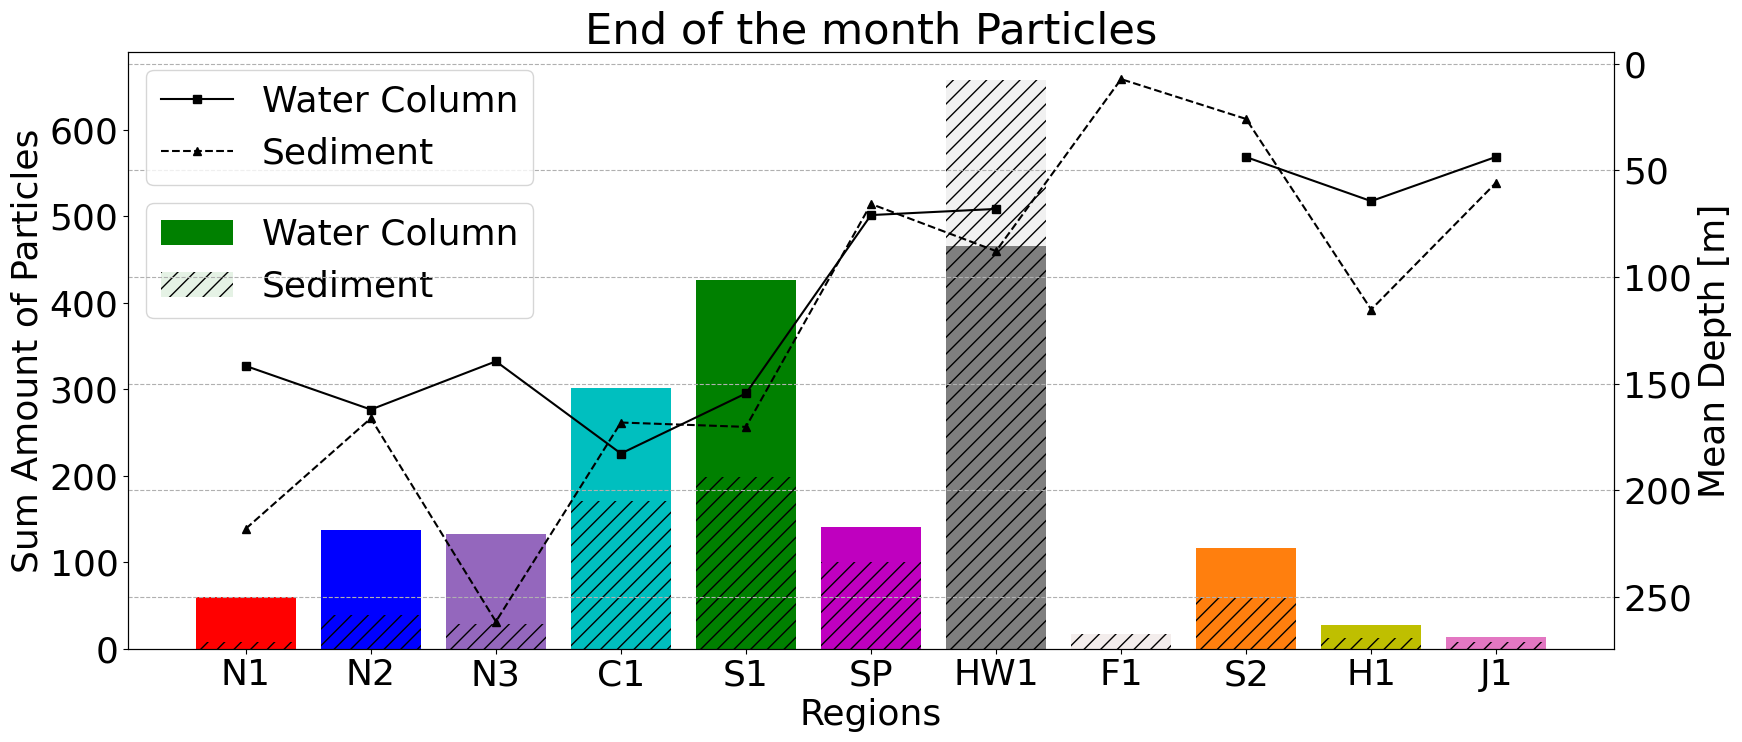

In [17]:
plt.rcParams.update({'font.size': 26})
colors_regions = ['r', 'b', 'tab:purple', 'c', 'g','m', 'tab:gray','tab:brown', 'tab:orange', 'y', 'tab:pink']
regions_labels =  ['N1', 'N2', 'N3', 'C1', 'S1', 'SP', 'HW1', 'F1', 'S2', 'H1', 'J1']
fig, axis = plt.subplots(figsize = (18,8))
#

ax = axis.twinx()
# Water column
axis.bar(regions_labels, bar_regions_water, color = colors_regions) 
axis.bar(regions_labels, bar_regions_sediment, color = colors_regions, hatch='//', alpha = .1) 
#
axis.bar(regions_labels[4], bar_regions_water[4], color = colors_regions[4], label = 'Water Column') 
axis.bar(regions_labels[4], bar_regions_sediment[4], color = colors_regions[4], hatch='//', alpha = .1, label = 'Sediment') 
#
axis.set_ylabel('Sum Amount of Particles')

#axis.grid()
axis.legend(loc = 'center left', bbox_to_anchor=(0, .65))
axis.set_xlabel('Regions') 
ax.plot(regions_labels,mean_depths_region_water, 's-k', label ='Water Column')   
ax.plot(regions_labels,mean_depths_region_sediment, '^--k', label = 'Sediment') 
ax.invert_yaxis() 
#
ax.legend(loc = 'upper left')
ax.grid(linestyle = '--')
ax.set_ylabel('Mean Depth [m]')
ax.set_title('End of the month Particles')



plt.tight_layout()

Volumes and concentrations

In [18]:
volumes_regions, _ = Regions_functions_V2.volumes()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'NSoG (N1)'),
  Text(1, 0, 'NSoG (N2)'),
  Text(2, 0, 'NSoG (N3)'),
  Text(3, 0, 'CSoG (C1)'),
  Text(4, 0, 'SSoG (S1)'),
  Text(5, 0, 'I. Plume (SP)'),
  Text(6, 0, 'Howe S. (HW1)'),
  Text(7, 0, 'Fraser R. (F1)'),
  Text(8, 0, 'SSoG (S2)'),
  Text(9, 0, 'Haro S. (H1)'),
  Text(10, 0, 'JdF S. (J1)')])

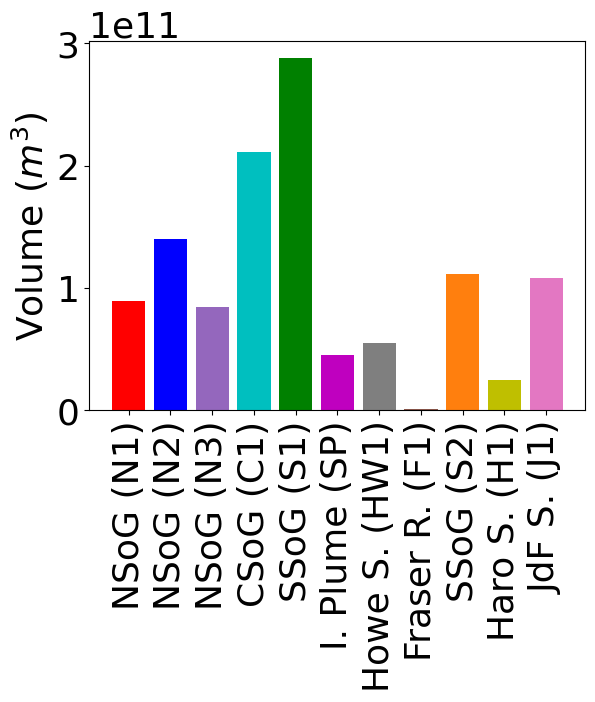

In [22]:
plt.bar(regions, volumes_regions, color = colors_regions)
plt.ylabel('Volume ($m^3$)')
plt.xticks(rotation=90)

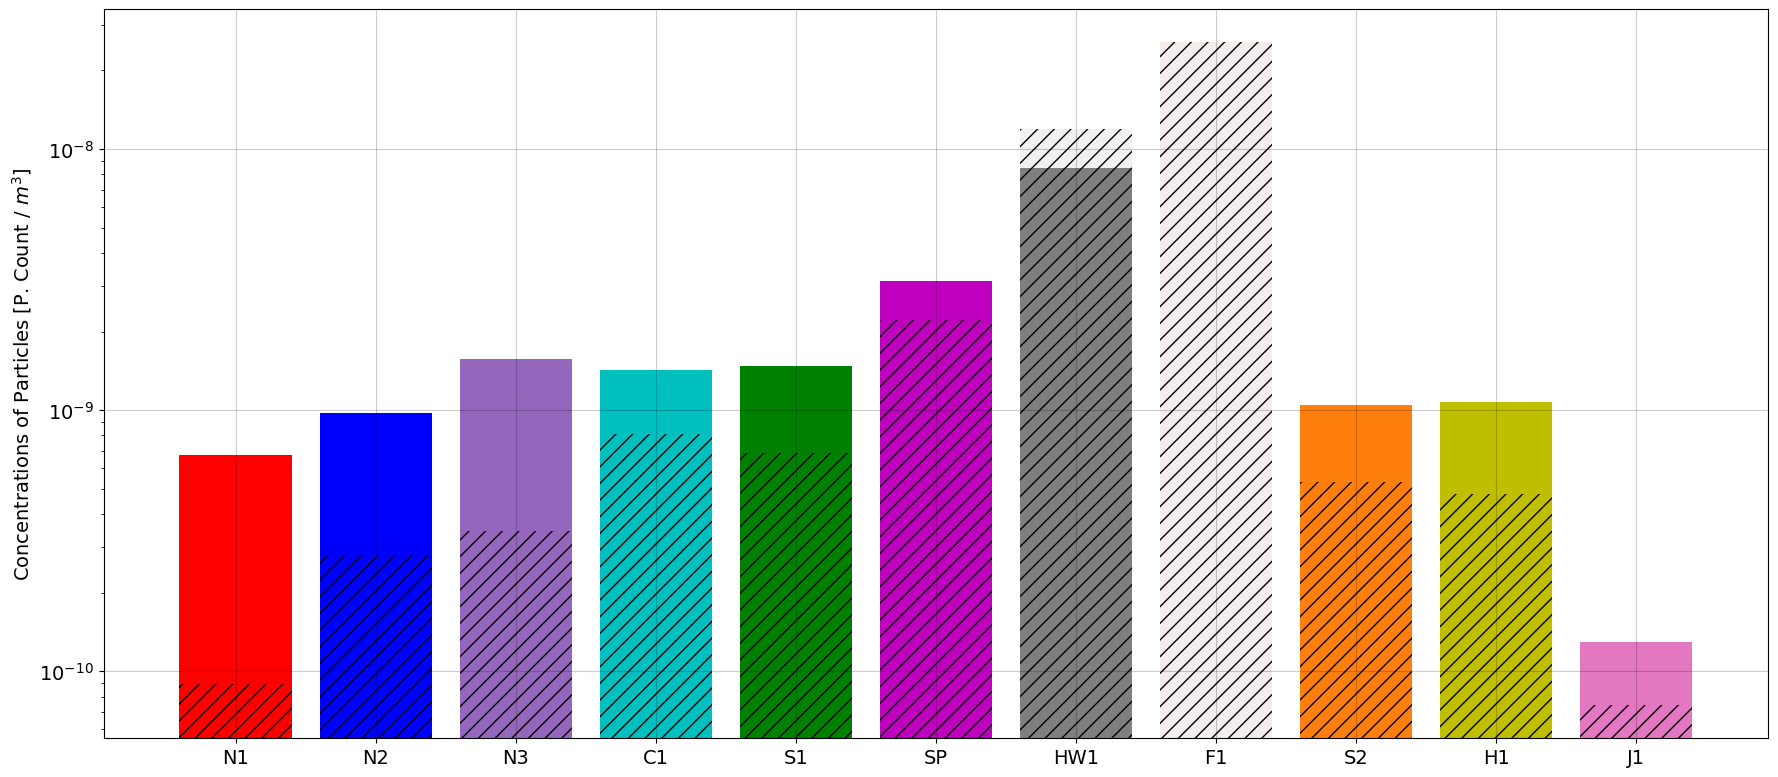

In [26]:
plt.rcParams.update({'font.size': 14})
fig, axis = plt.subplots(figsize = (18,8))
#
# Water column
axis.bar(regions_labels, np.array(bar_regions_water) / np.array(volumes_regions), color = colors_regions) 
axis.bar(regions_labels, np.array(bar_regions_sediment) / np.array(volumes_regions), color = colors_regions, hatch='//', alpha = .1) 
#
axis.bar(regions_labels[4], np.array(bar_regions_water[4]) / np.array(volumes_regions[4]), color = colors_regions[4], label = 'Water Column') 
axis.bar(regions_labels[4], np.array(bar_regions_sediment[4]) / np.array(volumes_regions[4]), color = colors_regions[4], hatch='//', alpha = .1, label = 'Sediment') 
#
axis.set_ylabel('Concentrations of Particles [P. Count / $m^3$]')
axis.set_yscale('log')
axis.grid(True, color='k', alpha=0.2)

plt.tight_layout()
plt.show()



Ratio in concentrations between NSoG and SSoG


In the paper they got 0.038 +- 0.014 day $^{-1}$ ---> (NSoG / SSoG) / (60)

In [30]:
water_N1_con = np.array(bar_regions_colloidal_water[0]) / np.array(volumes_regions[0]) + np.array(bar_regions_marine_water[0]) / np.array(volumes_regions[0])
water_S1_con = np.array(bar_regions_colloidal_water[4]) / np.array(volumes_regions[4]) + np.array(bar_regions_marine_water[4]) / np.array(volumes_regions[4])
N1_S1_ratio = water_N1_con / water_S1_con
print(N1_S1_ratio)

0.4544656670717056


Lets see how particles expand in the sediment

In [22]:
data_sediment = data.status.where(data.status > 10)
lat_sediment = data.lat.where(data.status > 10)
lon_sediment = data.lon.where(data.status > 10)

In [23]:
bathy = xr.open_dataset('/home/sallen/MEOPAR/grid/bathymetry_202108.nc')
cm_deep = copy.copy(cm.deep)
cm_deep.set_bad('k')

In [95]:
# To get the indexes of last month
start_time = pd.Timestamp('2022-01-01 00:00')
time_index = pd.date_range(start=start_time, periods=2190, freq='4H')

df = pd.DataFrame(index=time_index)
df['datetime'] = df.index  

last_times = df.resample('M').last()['datetime']

indices = df[df['datetime'].isin(last_times)].index.to_list()
#
integer_indices = [df.index.get_loc(ts) for ts in indices]

/tmp/ipykernel_1848801/2822038562.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  time_index = pd.date_range(start=start_time, periods=2190, freq='4H')
/tmp/ipykernel_1848801/2822038562.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  last_times = df.resample('M').last()['datetime']


In [96]:
integer_indices

[185, 353, 539, 719, 905, 1085, 1271, 1457, 1637, 1823, 2003, 2189]

/tmp/ipykernel_1520287/2687848183.py:25: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax.pcolormesh(bathy.nav_lon, bathy.nav_lat, bathy.Bathymetry, cmap=cm_deep, shading='auto')
/tmp/ipykernel_1520287/2687848183.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


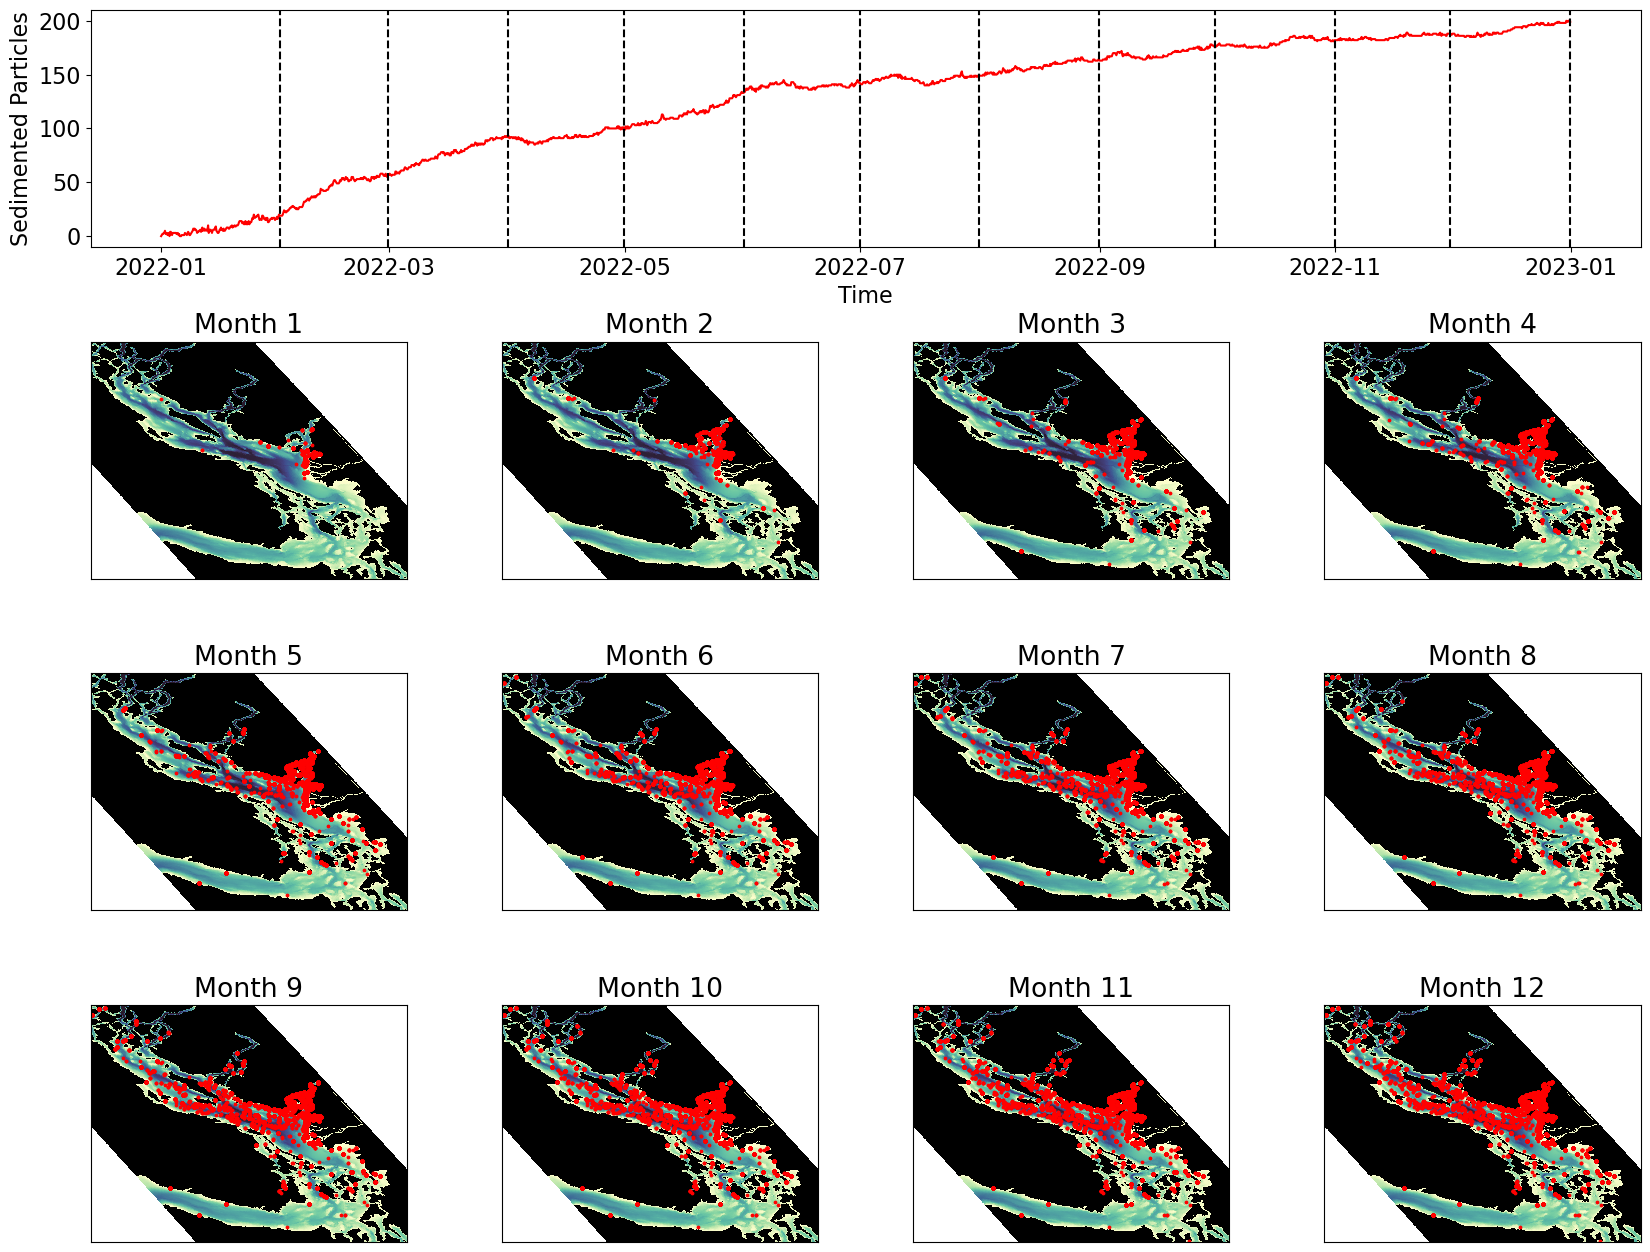

In [26]:
plt.rcParams.update({'font.size': 16})

fig = plt.figure(figsize=(20, 16))
gs = gridspec.GridSpec(4, 4, hspace=0.4, wspace=0.3)

ax_ts = fig.add_subplot(gs[0, :])  
ax_ts.plot(data.time[0, :], np.count_nonzero(data_sediment > 10, axis=0), color='r')

for month in range(12):
    idx = integer_indices[month]
    time_val = pd.Timestamp(data.time[0, idx].values)
    ax_ts.axvline(time_val, color='k', linestyle='--')
#
ax_ts.set_xlabel('Time')
ax_ts.set_ylabel('Sedimented Particles')

for month in range(12):
    row = 1 + (month // 4) 
    col = month % 4
    ax = fig.add_subplot(gs[row, col])
    
    idx = integer_indices[month]

    # Bathymetry
    ax.pcolormesh(bathy.nav_lon, bathy.nav_lat, bathy.Bathymetry, cmap=cm_deep, shading='auto')
    ax.set_xlim(-125.4, -122.3)
    ax.set_ylim(48, 50.5)
    
    # Sedimented particles
    ax.scatter(lon_sediment[:, :idx], lat_sediment[:, :idx], c='red', s=3)
    ax.set_title(f'Month {month+1}')
    ax.tick_params(
        which='both', bottom=False, top=False, left=False, right=False,
        labelbottom=False, labelleft=False,
    )

plt.tight_layout()
plt.show()


Lets create a table with the metrics

In [84]:
data = xr.open_dataset(filename)

/home/vvalenzuela/conda_envs/Parcels/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/home/vvalenzuela/conda_envs/Parcels/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Proportions

In [31]:
#
colloidal_water = []
marine_water = [] 
sewage_water = []
initial = []
colloidal_sediment = []
marine_sediment = []
sewage_sediment = []
particles_out = []
total = []
#
for i in range(len(data.obs)):
    len_initial = len(np.where(np.isfinite(data.status[:, i]) & (data.status[:, i] < 0.))[0])
    len_1 = len(np.where(np.isfinite(data.status[:, i]) & (data.status[:, i] == 1.))[0])
    len_2 = len(np.where(np.isfinite(data.status[:, i]) & (data.status[:, i] == 2.))[0])
    len_3 = len(np.where(np.isfinite(data.status[:, i]) & (data.status[:, i] == 3.))[0])
    len_11 = len(np.where(np.isfinite(data.status[:, i]) & (data.status[:, i] == 11.))[0])
    len_12 = len(np.where(np.isfinite(data.status[:, i]) & (data.status[:, i] == 12.))[0])
    len_13 = len(np.where(np.isfinite(data.status[:, i]) & (data.status[:, i] == 13.))[0])
    len_out = len(np.where(np.isfinite(data.status[:, i]) & (data.status[:, i] == 7.))[0])
    #
    len_T = np.count_nonzero(~np.isnan(data.status[:, i]))
    #
    colloidal_water.append(len_2)
    marine_water.append(len_3) 
    sewage_water.append(len_1)
    initial.append(len_initial)
    colloidal_sediment.append(len_12)
    marine_sediment.append(len_13)
    sewage_sediment.append(len_11)
    particles_out.append(len_out)
    total.append(len_T)
#    
proportion_initial = np.array(initial)/np.array(total) *100
#
proportion_colloidal_water = np.array(colloidal_water)/np.array(total) *100
proportion_marine_water = np.array(marine_water)/np.array(total) *100
proportion_sewage_water = np.array(sewage_water)/np.array(total) *100
#
proportion_colloidal_sediment = np.array(colloidal_sediment)/np.array(total) *100
proportion_marine_sediment = np.array(marine_sediment)/np.array(total) *100
proportion_sewage_sediment = np.array(sewage_sediment)/np.array(total) *100
#
proportion_out = np.array(particles_out)/np.array(total) *100

In [32]:
print(proportion_colloidal_water[-1], ' %')
print(proportion_colloidal_sediment[-1], ' %')
print(proportion_marine_water[-1], ' %')
print(proportion_marine_sediment[-1], ' %')
print(proportion_out[-1], ' %')

26.666666666666668  %
39.44444444444444  %
0.5555555555555556  %
15.833333333333332  %
17.5  %


In [33]:
ratio_MC_Water = proportion_marine_water / proportion_colloidal_water
ratio_MC_Sediment = proportion_marine_sediment / proportion_colloidal_sediment
print(ratio_MC_Water[-1])
print(ratio_MC_Sediment[-1])

0.020833333333333332
0.4014084507042253


/tmp/ipykernel_1111431/413738116.py:1: RuntimeWarning: invalid value encountered in divide
  ratio_MC_Water = proportion_marine_water / proportion_colloidal_water
/tmp/ipykernel_1111431/413738116.py:2: RuntimeWarning: divide by zero encountered in divide
  ratio_MC_Sediment = proportion_marine_sediment / proportion_colloidal_sediment
/tmp/ipykernel_1111431/413738116.py:2: RuntimeWarning: invalid value encountered in divide
  ratio_MC_Sediment = proportion_marine_sediment / proportion_colloidal_sediment


In [118]:
data_water = data.where((data.status > 0) & (data.status < 4))
data_sediment = data.where(data.status > 10)

In [31]:
data_sediment.z.mean().values

array(110.10851626)

In [32]:
depth_mean_water = data_water.z.mean().values
depth_mean_sediment = data_sediment.z.mean().values

/tmp/ipykernel_1520287/408882608.py:4: RuntimeWarning: divide by zero encountered in divide
  ax.plot(time_axis,proportion_marine_sediment / proportion_colloidal_sediment, label='Sediment', c = 'g')
/tmp/ipykernel_1520287/408882608.py:4: RuntimeWarning: invalid value encountered in divide
  ax.plot(time_axis,proportion_marine_sediment / proportion_colloidal_sediment, label='Sediment', c = 'g')
/tmp/ipykernel_1520287/408882608.py:9: RuntimeWarning: invalid value encountered in divide
  axins.plot(time_axis, proportion_marine_water / proportion_colloidal_water, label='Water Column', c = 'b')


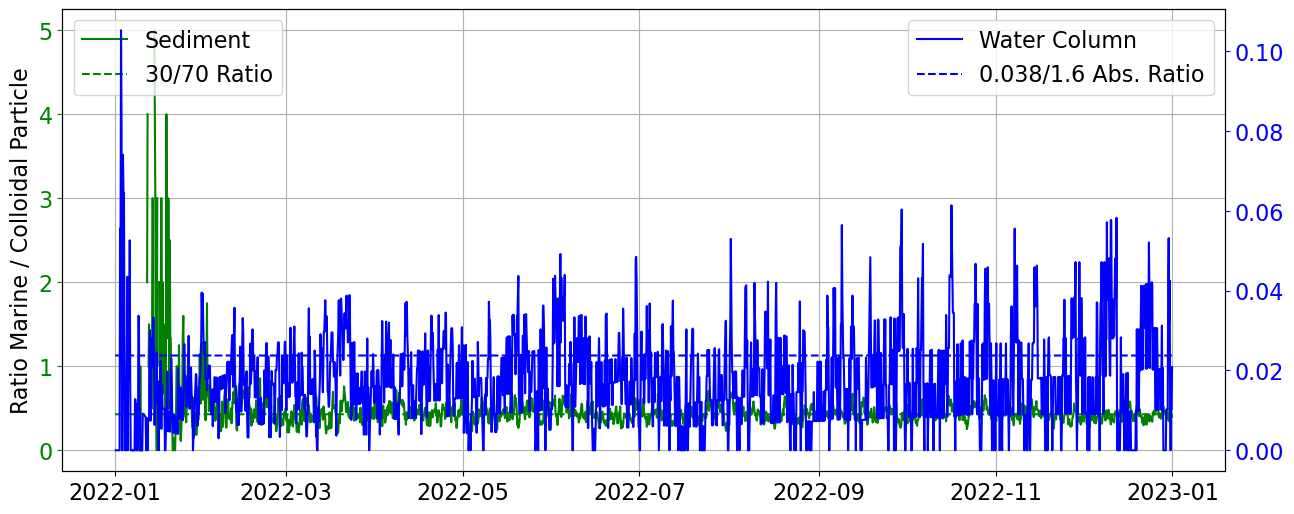

In [33]:
# Ratios in water column, sediment and buried
fig, ax = plt.subplots(figsize = (15,6))
time_axis = data.time[0,:]
ax.plot(time_axis,proportion_marine_sediment / proportion_colloidal_sediment, label='Sediment', c = 'g')
ax.plot(data.time[0, :], 30/70. * np.ones_like(data.status[0, :]), '--', c='g', label = '30/70 Ratio')

#ax.plot(time_axis, proportion_marine_buried / proportion_colloidal_buried, label='Buried', c = 'tab:brown')
axins = ax.twinx()
axins.plot(time_axis, proportion_marine_water / proportion_colloidal_water, label='Water Column', c = 'b')
axins.plot(data.time[0, :], 0.038/1.6 * np.ones_like(data.status[0, :]), '--', c='b', label = '0.038/1.6 Abs. Ratio')
#
ax.tick_params(axis='y', colors='green')
axins.tick_params(axis='y', colors='blue')

#
ax.set_ylabel('Ratio Marine / Colloidal Particle')
ax.grid();
ax.legend(loc = 'upper left');
axins.legend(loc = 'upper right');

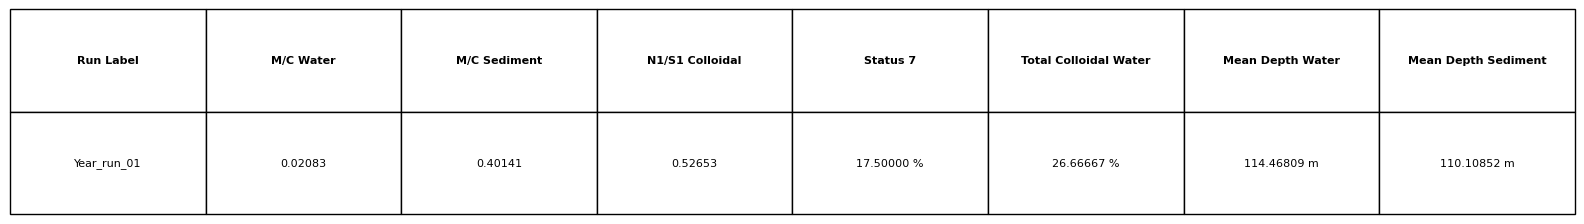

In [34]:
column_labels = ['Run Label','M/C Water', 'M/C Sediment', 'N1/S1 Colloidal', 'Status 7',
                'Total Colloidal Water', 'Mean Depth Water', 'Mean Depth Sediment'
]
#
metrics = ['Year_run_01',
    f"{ratio_MC_Water[-1]:.5f}",
    f"{ratio_MC_Sediment[-1]:.5f}",
    f"{N1_S1_ratio:.5f}",
    f"{proportion_out[-1]:.5f} %",
    f"{proportion_colloidal_water[-1]:.5f} %",
    f"{depth_mean_water:.5f} m",
    f"{depth_mean_sediment:.5f} m"
]
#
fig, ax = plt.subplots(figsize=(16, 3))  
ax.axis("off")
#
#
table = ax.table(
    cellText=[metrics],
    colLabels=column_labels,
    loc="center",
    cellLoc="center"
)
#
for (row, col), cell in table.get_celld().items():
    cell.set_fontsize(50)
    cell.set_height(0.3)
    if row == 0:
        cell.set_text_props(weight='bold')
#
table.scale(1.2, 2.5)
plt.tight_layout()
plt.show()



# Total spreading pattern and distribution in depth :D

Concentration Map for particles in the water vs in the sediment

In [35]:
data

<xarray.Dataset> Size: 35MB
Dimensions:       (trajectory: 360, obs: 2190)
Coordinates:
  * obs           (obs) int32 9kB 0 1 2 3 4 5 ... 2184 2185 2186 2187 2188 2189
  * trajectory    (trajectory) int64 3kB 0 1 2 3 4 5 ... 354 355 356 357 358 359
Data variables:
    fact          (trajectory, obs) float32 3MB ...
    lat           (trajectory, obs) float64 6MB ...
    lon           (trajectory, obs) float64 6MB ...
    release_time  (trajectory, obs) float32 3MB ...
    status        (trajectory, obs) float32 3MB -2.0 2.0 2.0 ... 12.0 12.0 12.0
    time          (trajectory, obs) datetime64[ns] 6MB ...
    z             (trajectory, obs) float64 6MB ...
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_kernels:        MPParticlePBDEs_statesSinkingAdvectionturb_mixres...
    parcels_mesh:           spherical
    parcels_version:        3.1.2

In [97]:
data_monthly = data.isel(obs=integer_indices)

In [98]:
coords = xr.open_dataset('/ocean/vvalenzuela/MOAD/grid/coordinates_seagrid_SalishSea201702.nc', decode_times=False)
mask = xr.open_dataset('/ocean/vvalenzuela/MOAD/grid2/mesh_mask202108_TDV.nc')
bathy = xr.open_dataset('/ocean/vvalenzuela/MOAD/grid/bathymetry_202108.nc')

In [99]:
def particles_concentration_map(lons, lats, mask=mask, num_lon=60, num_lat=70):
    # Define lon and lat lenght 
    longitudes = np.linspace(mask['nav_lon'].min(), mask['nav_lon'].max(), num_lon + 1)
    latitudes = np.linspace(mask['nav_lat'].min(), mask['nav_lat'].max(), num_lat + 1)
    #
    # Particle positions into bins
    lon_indices = np.digitize(lons, longitudes) - 1 
    lat_indices = np.digitize(lats, latitudes) - 1
    #
    amount = np.zeros((num_lon, num_lat))
    #
    valid_mask = (lon_indices >= 0) & (lon_indices < num_lon) & (lat_indices >= 0) & (lat_indices < num_lat)
    lon_indices, lat_indices = lon_indices[valid_mask], lat_indices[valid_mask]
    # Count particles 
    indices = np.ravel_multi_index((lon_indices, lat_indices), dims=(num_lon, num_lat))
    counts = np.bincount(indices, minlength=num_lon * num_lat).reshape((num_lon, num_lat))
    #
    amount[:counts.shape[0], :counts.shape[1]] = counts
    #
    return pd.DataFrame(amount)

In [100]:
def particles_concentration_map_by_depth(lons, lats, depths, depth_bins, mask=mask, num_lon=60, num_lat=70):
    """
    Compute particle concentrations in lon-lat bins, separated by depth ranges.
    
    Parameters:
    - lons, lats, depths: arrays of particle positions and depths (same shape)
    - depth_bins: list of tuples/lists, e.g. [(0,15), (16,50), ...]
    - mask: mask dataset with 'nav_lon' and 'nav_lat'
    - num_lon, num_lat: number of bins along longitude and latitude

    Returns:
    - dict of {depth_range_str: DataFrame of particle concentration}
    """
    # Create lon-lat bins
    longitudes = np.linspace(mask['nav_lon'].min(), mask['nav_lon'].max(), num_lon + 1)
    latitudes = np.linspace(mask['nav_lat'].min(), mask['nav_lat'].max(), num_lat + 1)

    # Assign lon/lat indices to bins
    lon_indices = np.digitize(lons, longitudes) - 1
    lat_indices = np.digitize(lats, latitudes) - 1

    # Mask valid bin positions
    valid_mask = (
        (lon_indices >= 0) & (lon_indices < num_lon) &
        (lat_indices >= 0) & (lat_indices < num_lat)
    )
    lon_indices = lon_indices[valid_mask]
    lat_indices = lat_indices[valid_mask]
    depths = depths[valid_mask]  # Filter depths accordingly

    # Dictionary to store results
    results = {}

    for depth_min, depth_max in depth_bins:
        # Mask for particles in current depth range
        depth_mask = (depths >= depth_min) & (depths <= depth_max)
        lon_i = lon_indices[depth_mask]
        lat_i = lat_indices[depth_mask]

        # Count particles in 2D bins
        if len(lon_i) > 0:
            flat_indices = np.ravel_multi_index((lon_i, lat_i), dims=(num_lon, num_lat))
            counts = np.bincount(flat_indices, minlength=num_lon * num_lat).reshape((num_lon, num_lat))
        else:
            counts = np.zeros((num_lon, num_lat))

        # Store as DataFrame
        label = f"{depth_min}-{depth_max} m"
        results[label] = pd.DataFrame(counts)

    return results


In [101]:
lon_sed = data.where(data['status'] > 10)['lon'].values.flatten()        
lat_sed = data.where(data['status'] > 10)['lat'].values.flatten()
depth_sed = data.where(data['status'] > 10)['z'].values.flatten()
#########
lon_wat = data.where((data['status'] > 0) & (data['status'] < 4))['lon'].values.flatten()
lat_wat = data.where((data['status'] > 0) & (data['status'] < 4))['lat'].values.flatten()
depth_wat = data.where((data['status'] > 0) & (data['status'] < 4))['z'].values.flatten()

In [102]:
depths_bins = [(0,15), (20,80), (100,250), (250,400)]

In [103]:
concentration_sediment = particles_concentration_map_by_depth(lons=lon_sed, lats=lat_sed, depths = depth_sed, depth_bins = depths_bins)
concentration_water = particles_concentration_map_by_depth(lons=lon_wat, lats=lat_wat, depths = depth_wat, depth_bins = depths_bins)
total_concentration = particles_concentration_map_by_depth(lons=data['lon'].values.flatten(), lats=data['lat'].values.flatten(), depths = data['z'].values.flatten(), depth_bins = depths_bins)
#
total_sediment = particles_concentration_map(lons=lon_sed, lats=lat_sed)
total_water = particles_concentration_map(lons=lon_wat, lats=lat_wat)
total_depth = particles_concentration_map(lons=data['lon'], lats=data['lat'])

In [104]:
labels = ['0-15 m', '20-80 m', '100-250 m', '250-400 m']

In [105]:
clat = [49.195045]
clon = [-123.301956]
num_lon = 60
num_lat = 70
longitudes = np.linspace(mask['nav_lon'].min(), mask['nav_lon'].max(), num_lon)
latitudes = np.linspace(mask['nav_lat'].min(), mask['nav_lat'].max(), num_lat)

In [106]:

TT = 1000
norm = LogNorm(vmin=total_depth.min().min() + 1e-1, vmax=total_depth.max().max())

/tmp/ipykernel_1848801/4107063119.py:11: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax[0,0].pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0][0], cmap = cmap)
/tmp/ipykernel_1848801/4107063119.py:24: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax[0,1].pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0][0], cmap = cmap)
/tmp/ipykernel_1848801/4107063119.py:37: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case

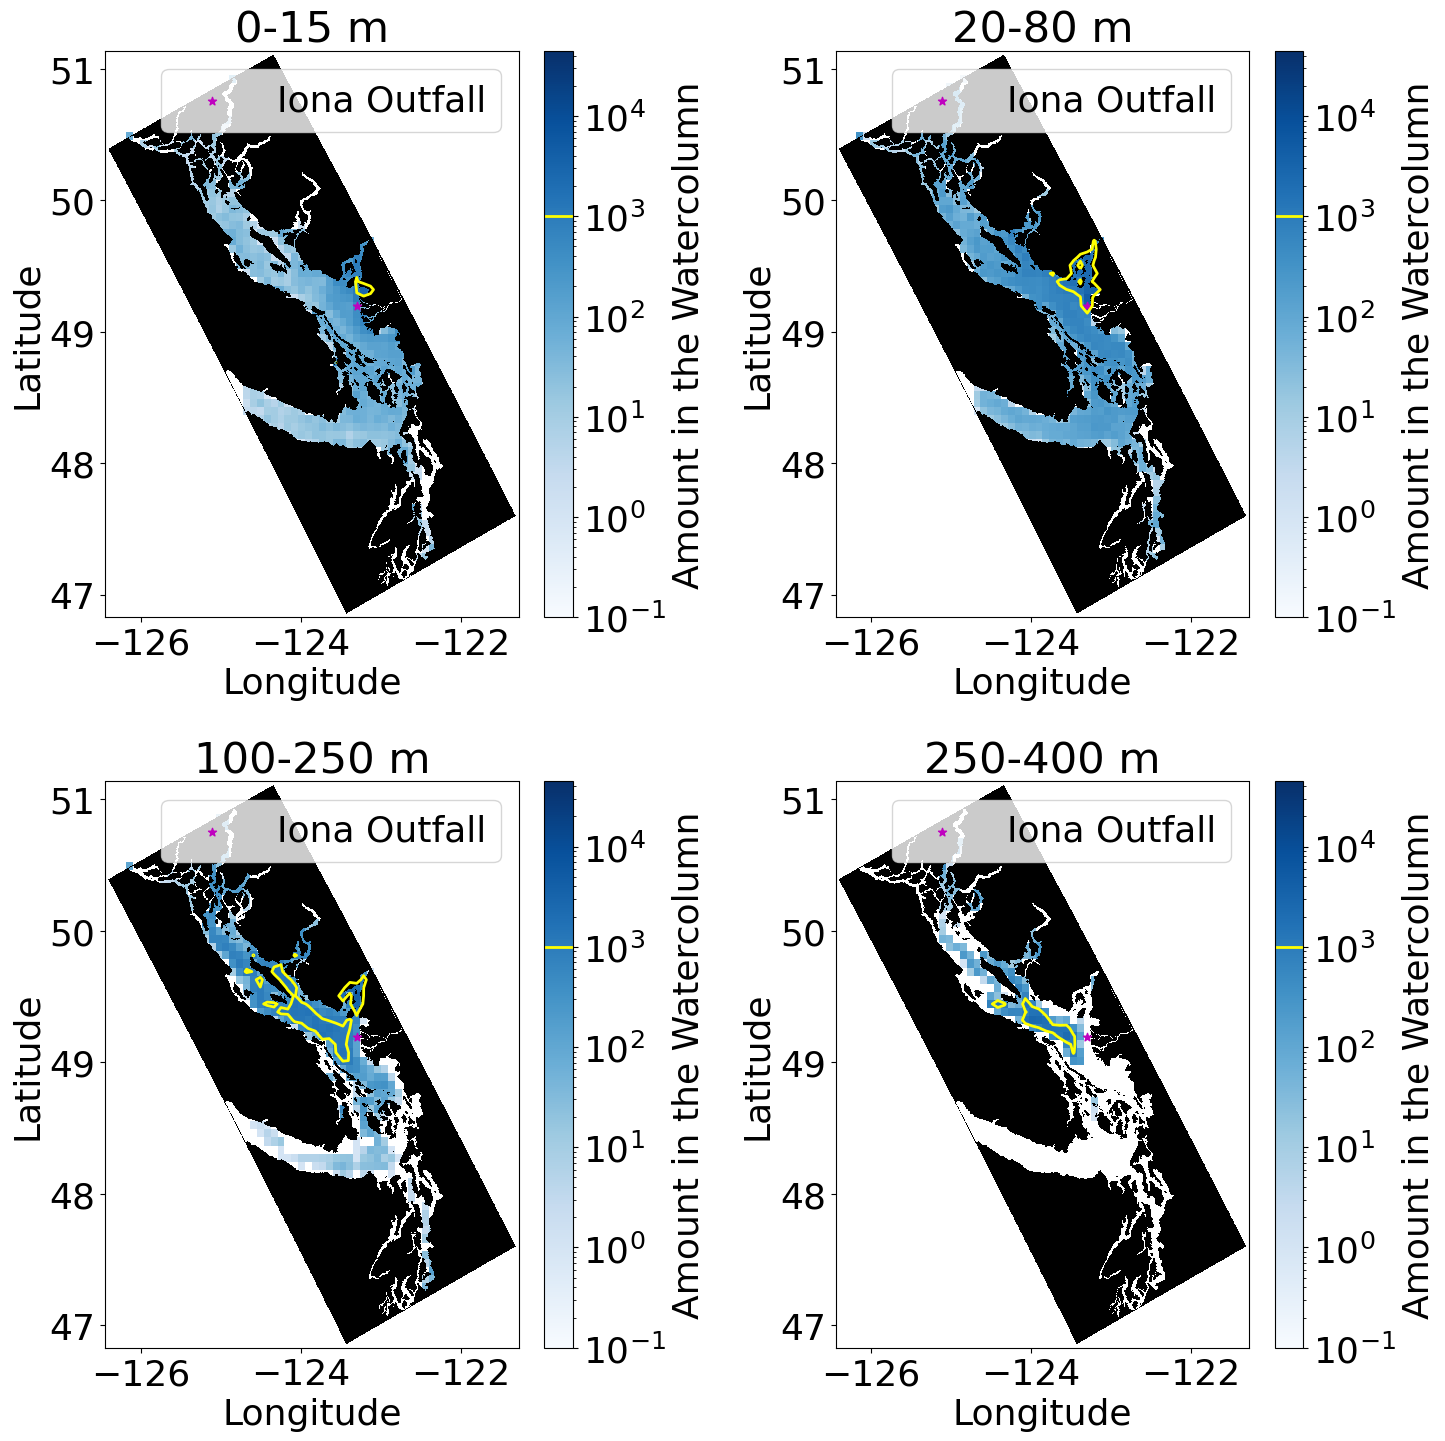

In [107]:

colors = [(0, 0, 0, 1),  # Black for land (1)
          (0, 0, 0, 0)]  # Transparent for water (0)
cmap = ListedColormap(colors)
yellow_cmap = ListedColormap(['yellow'])

#
fig, ax = plt.subplots(2,2,figsize=(15,15))
# 0-15 m
c = ax[0,0].pcolormesh(longitudes, latitudes, concentration_water[labels[0]].T, cmap='Blues', norm=norm)
ax[0,0].contour(longitudes, latitudes, concentration_water[labels[0]].T,levels=[TT],colors='yellow',linewidths=2)
ax[0,0].pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0][0], cmap = cmap)
ax[0,0].scatter(clon,clat, c = 'm', marker = '*', label = 'Iona Outfall')
# colorbar
cb = fig.colorbar(c, ax=ax[0,0], label="Amount in the Watercolumn")
cb.ax.hlines(TT, *cb.ax.get_xlim(), color='yellow', linewidth=2) 
ax[0,0].legend()
ax[0,0].set_ylabel('Latitude')
ax[0,0].set_xlabel('Longitude')
ax[0,0].set_title(labels[0])
#
# 20-80 m
c = ax[0,1].pcolormesh(longitudes, latitudes, concentration_water[labels[1]].T, cmap='Blues', norm=norm)
ax[0,1].contour(longitudes, latitudes, concentration_water[labels[1]].T,levels=[TT],colors='yellow',linewidths=2)
ax[0,1].pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0][0], cmap = cmap)
ax[0,1].scatter(clon,clat, c = 'm', marker = '*', label = 'Iona Outfall')
# colorbar
cb = fig.colorbar(c, ax=ax[0,1], label="Amount in the Watercolumn")
cb.ax.hlines(TT, *cb.ax.get_xlim(), color='yellow', linewidth=2) 
ax[0,1].legend()
ax[0,1].set_ylabel('Latitude')
ax[0,1].set_xlabel('Longitude')
ax[0,1].set_title(labels[1])
#
# 100-250 m
c = ax[1,0].pcolormesh(longitudes, latitudes, concentration_water[labels[2]].T, cmap='Blues', norm=norm)
ax[1,0].contour(longitudes, latitudes, concentration_water[labels[2]].T,levels=[TT],colors='yellow',linewidths=2)
ax[1,0].pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0][0], cmap = cmap)
ax[1,0].scatter(clon,clat, c = 'm', marker = '*', label = 'Iona Outfall')
# colorbar
cb = fig.colorbar(c, ax=ax[1,0], label="Amount in the Watercolumn")
cb.ax.hlines(TT, *cb.ax.get_xlim(), color='yellow', linewidth=2) 
ax[1,0].legend()
ax[1,0].set_ylabel('Latitude')
ax[1,0].set_xlabel('Longitude')
ax[1,0].set_title(labels[2])
#
# 250-400 m
c = ax[1,1].pcolormesh(longitudes, latitudes, concentration_water[labels[3]].T, cmap='Blues', norm=norm)
ax[1,1].contour(longitudes, latitudes, concentration_water[labels[3]].T,levels=[TT],colors='yellow',linewidths=2)
ax[1,1].pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0][0], cmap = cmap)
ax[1,1].scatter(clon,clat, c = 'm', marker = '*', label = 'Iona Outfall')
# colorbar
cb = fig.colorbar(c, ax=ax[1,1], label="Amount in the Watercolumn")
cb.ax.hlines(TT, *cb.ax.get_xlim(), color='yellow', linewidth=2)
ax[1,1].legend()
ax[1,1].set_ylabel('Latitude')
ax[1,1].set_xlabel('Longitude')
ax[1,1].set_title(labels[3])
plt.tight_layout()

/tmp/ipykernel_1520287/2825446158.py:5: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax[0,0].pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0][0], cmap = cmap)
/tmp/ipykernel_1520287/2825446158.py:18: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax[0,1].pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0][0], cmap = cmap)
/tmp/ipykernel_1520287/2825446158.py:31: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case,

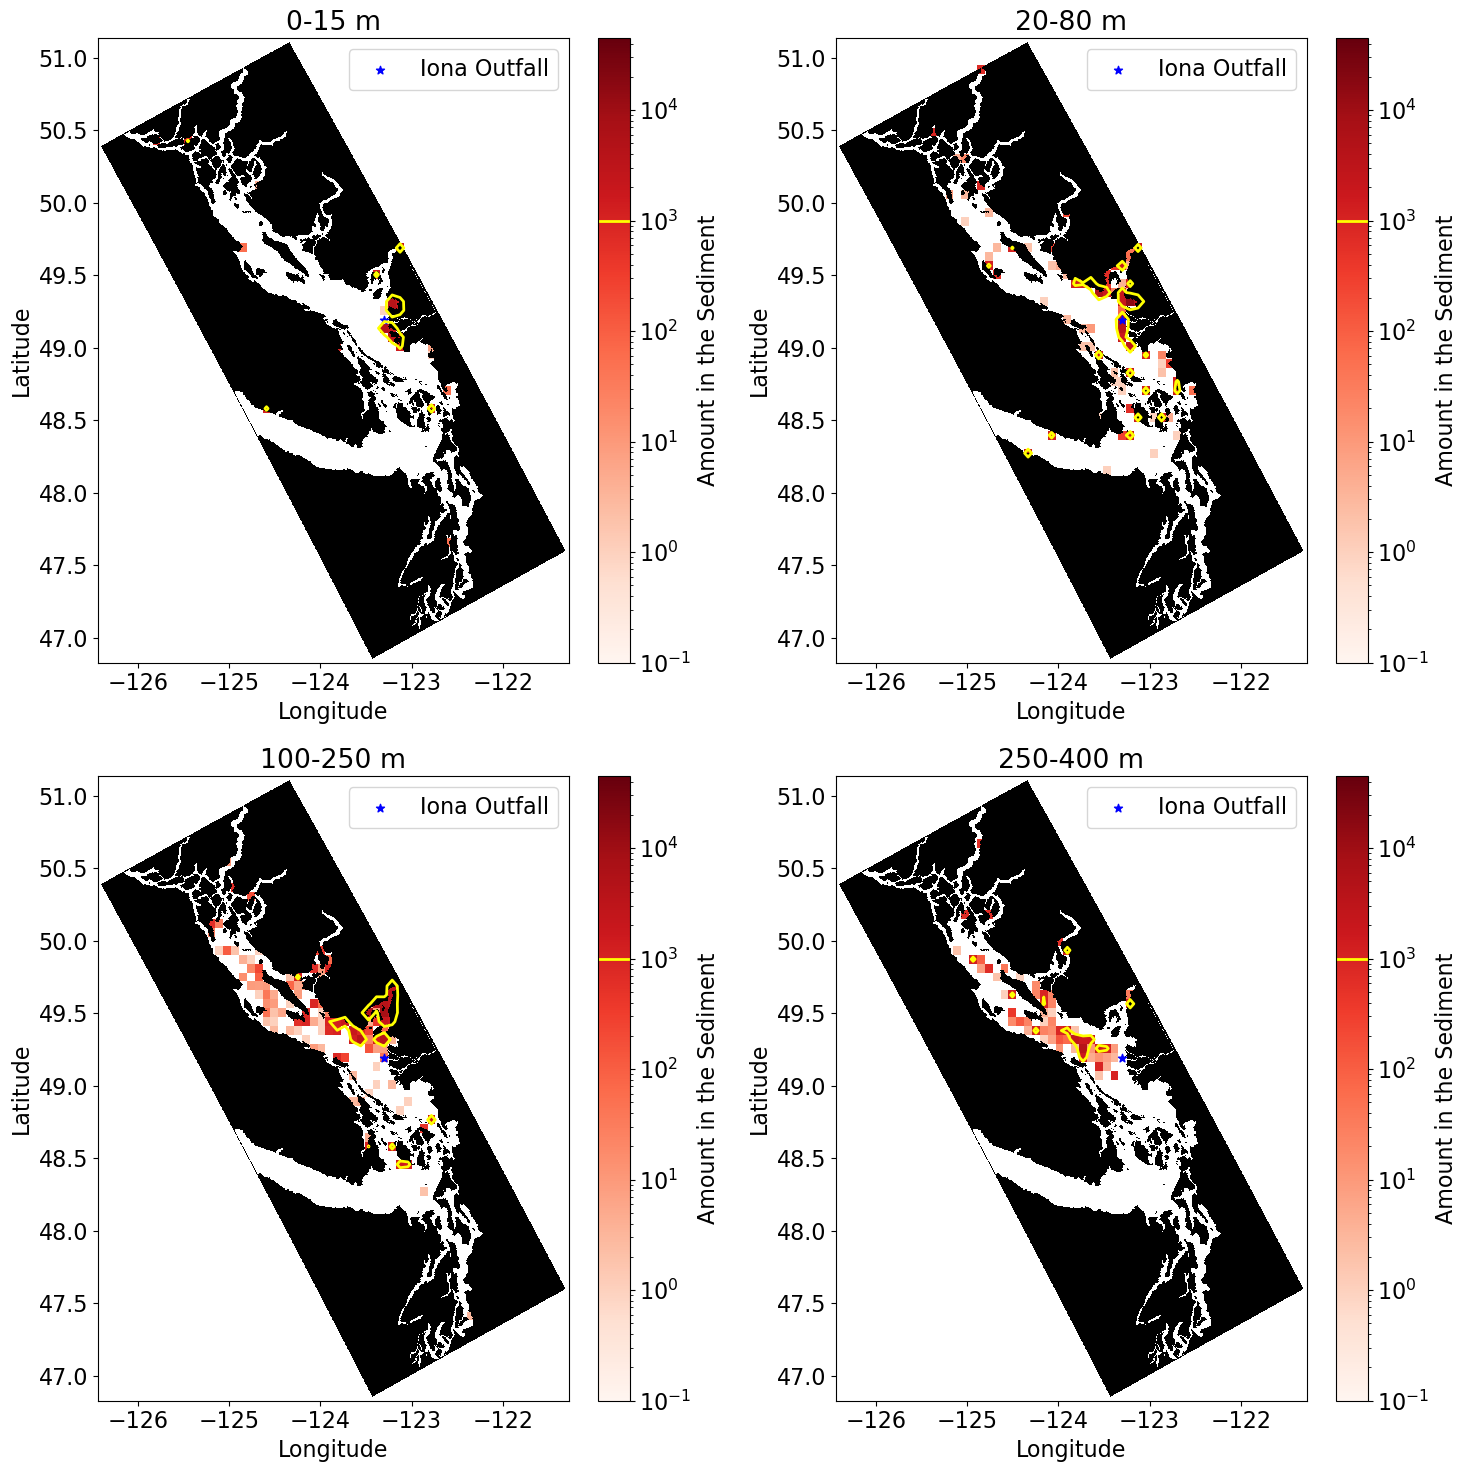

In [47]:
fig, ax = plt.subplots(2,2,figsize=(15,15))
# 0-15 m
c = ax[0,0].pcolormesh(longitudes, latitudes, concentration_sediment[labels[0]].T, cmap='Reds', norm=norm)
ax[0,0].contour(longitudes, latitudes, concentration_sediment[labels[0]].T,levels=[TT],colors='yellow',linewidths=2)
ax[0,0].pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0][0], cmap = cmap)
ax[0,0].scatter(clon,clat, c = 'b', marker = '*', label = 'Iona Outfall')
# colorbar
cb = fig.colorbar(c, ax=ax[0,0], label="Amount in the Sediment")
cb.ax.hlines(TT, *cb.ax.get_xlim(), color='yellow', linewidth=2)
ax[0,0].legend()
ax[0,0].set_ylabel('Latitude')
ax[0,0].set_xlabel('Longitude')
ax[0,0].set_title(labels[0])
#
# 20-80 m
c = ax[0,1].pcolormesh(longitudes, latitudes, concentration_sediment[labels[1]].T, cmap='Reds', norm=norm)
ax[0,1].contour(longitudes, latitudes, concentration_sediment[labels[1]].T,levels=[TT],colors='yellow',linewidths=2)
ax[0,1].pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0][0], cmap = cmap)
ax[0,1].scatter(clon,clat, c = 'b', marker = '*', label = 'Iona Outfall')
# colorbar
cb = fig.colorbar(c, ax=ax[0,1], label="Amount in the Sediment")
cb.ax.hlines(TT, *cb.ax.get_xlim(), color='yellow', linewidth=2)
ax[0,1].legend()
ax[0,1].set_ylabel('Latitude')
ax[0,1].set_xlabel('Longitude')
ax[0,1].set_title(labels[1])
#
# 100-250 m
c = ax[1,0].pcolormesh(longitudes, latitudes, concentration_sediment[labels[2]].T, cmap='Reds', norm=norm)
ax[1,0].contour(longitudes, latitudes, concentration_sediment[labels[2]].T,levels=[TT],colors='yellow',linewidths=2)
ax[1,0].pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0][0], cmap = cmap)
ax[1,0].scatter(clon,clat, c = 'b', marker = '*', label = 'Iona Outfall')
# colorbar
cb = fig.colorbar(c, ax=ax[1,0], label="Amount in the Sediment")
cb.ax.hlines(TT, *cb.ax.get_xlim(), color='yellow', linewidth=2)
ax[1,0].legend()
ax[1,0].set_ylabel('Latitude')
ax[1,0].set_xlabel('Longitude')
ax[1,0].set_title(labels[2])
#
# 250-400 m
c = ax[1,1].pcolormesh(longitudes, latitudes, concentration_sediment[labels[3]].T, cmap='Reds', norm=norm)
ax[1,1].contour(longitudes, latitudes, concentration_sediment[labels[3]].T,levels=[TT],colors='yellow',linewidths=2)
ax[1,1].pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0][0], cmap = cmap)
ax[1,1].scatter(clon,clat, c = 'b', marker = '*', label = 'Iona Outfall')
# colorbar
cb = fig.colorbar(c, ax=ax[1,1], label="Amount in the Sediment")
cb.ax.hlines(TT, *cb.ax.get_xlim(), color='yellow', linewidth=2)
ax[1,1].legend()
ax[1,1].set_ylabel('Latitude')
ax[1,1].set_xlabel('Longitude')
ax[1,1].set_title(labels[3])
plt.tight_layout()

Total sediment map

In [108]:
TT_sediment_1 = 1000


/tmp/ipykernel_1848801/2080548923.py:7: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax.pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0][0], cmap=cmap)


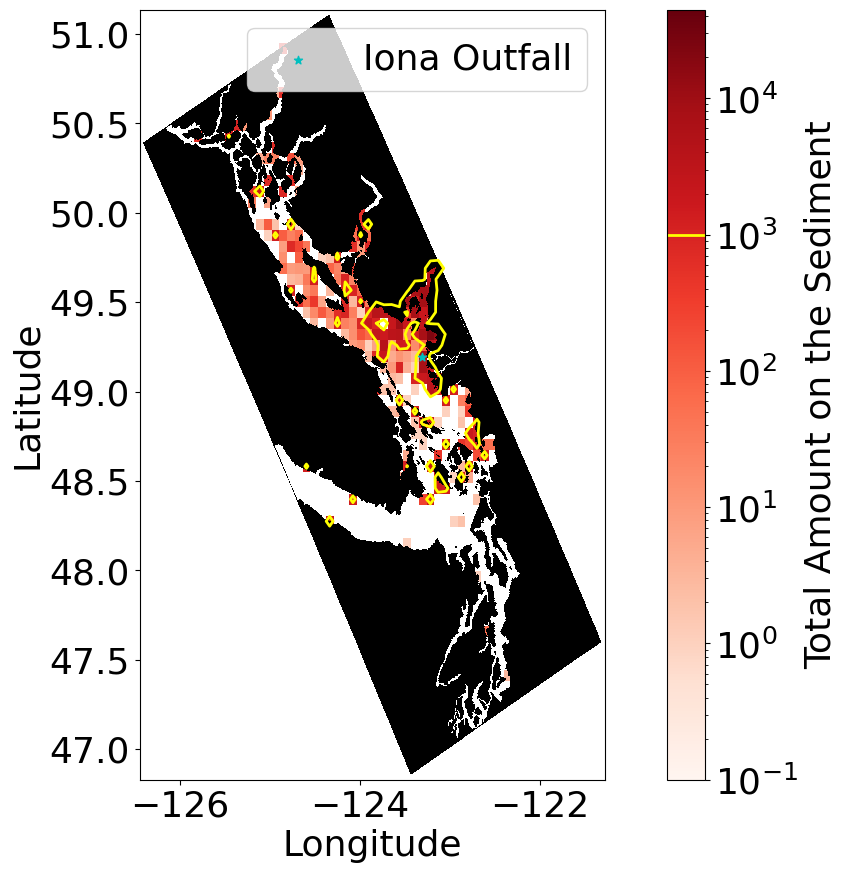

In [121]:
fig, ax = plt.subplots(figsize=(8, 10))

# Left plot: pcolormesh
c_t = ax.pcolormesh(longitudes, latitudes, total_sediment.T, cmap='Reds', norm=norm)
ax.contour(longitudes, latitudes, total_sediment.T,levels=[TT_sediment_1],colors='yellow',linewidths=2)

ax.pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0][0], cmap=cmap)
ax.scatter(clon, clat, c='c', marker='*', label='Iona Outfall')

# Colorbar below both axes
cb_t = fig.colorbar(c_t, ax=ax, label="Total Amount on the Sediment", orientation='vertical', pad=0.1)
cb_t.ax.hlines(TT_sediment_1, *cb_t.ax.get_xlim(), color='yellow', linewidth=2)

# Ax1 config
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.legend()

/tmp/ipykernel_1848801/1199333588.py:7: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax.pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0][0], cmap=cmap)


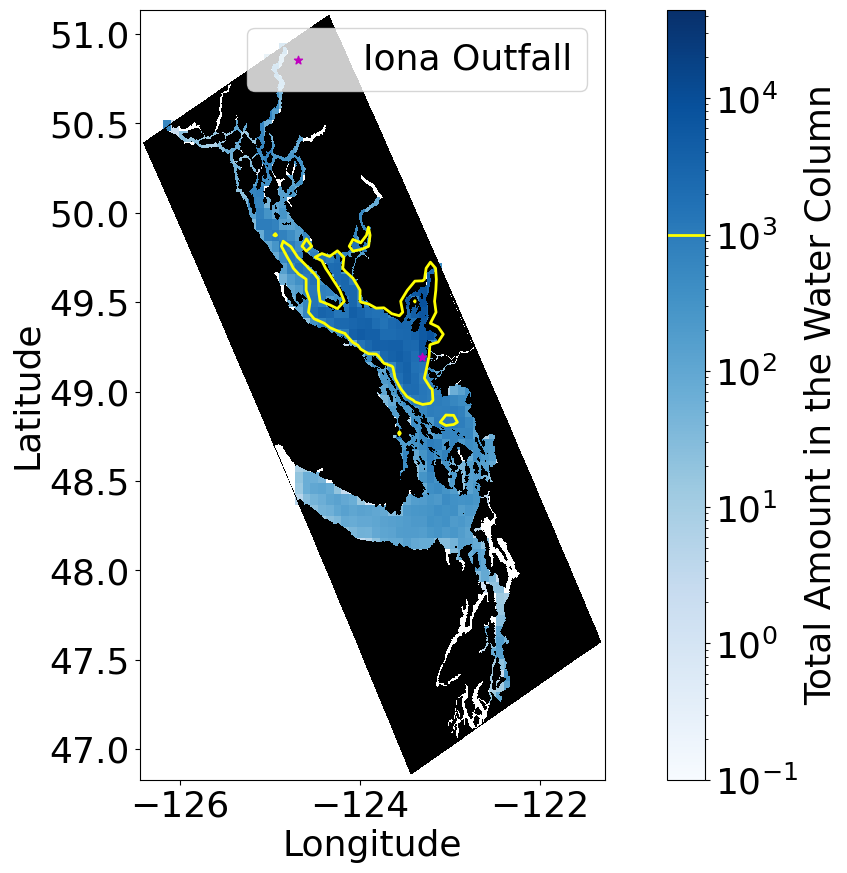

In [112]:
fig, ax = plt.subplots(figsize=(8, 10))

# Left plot: pcolormesh
c_t = ax.pcolormesh(longitudes, latitudes, total_water.T, cmap='Blues', norm=norm)
ax.contour(longitudes, latitudes, total_water.T,levels=[TT_sediment_1],colors='yellow',linewidths=2)

ax.pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0][0], cmap=cmap)
ax.scatter(clon, clat, c='m', marker='*', label='Iona Outfall')

# Colorbar below both axes
cb_t = fig.colorbar(c_t, ax=ax, label="Total Amount in the Water Column", orientation='vertical', pad=0.1)
cb_t.ax.hlines(TT_sediment_1, *cb_t.ax.get_xlim(), color='yellow', linewidth=2)

# Ax1 config
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.legend()

Total map and plots per depth ranges :D

/tmp/ipykernel_1848801/509389570.py:7: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax3.pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0][0], cmap=cmap)


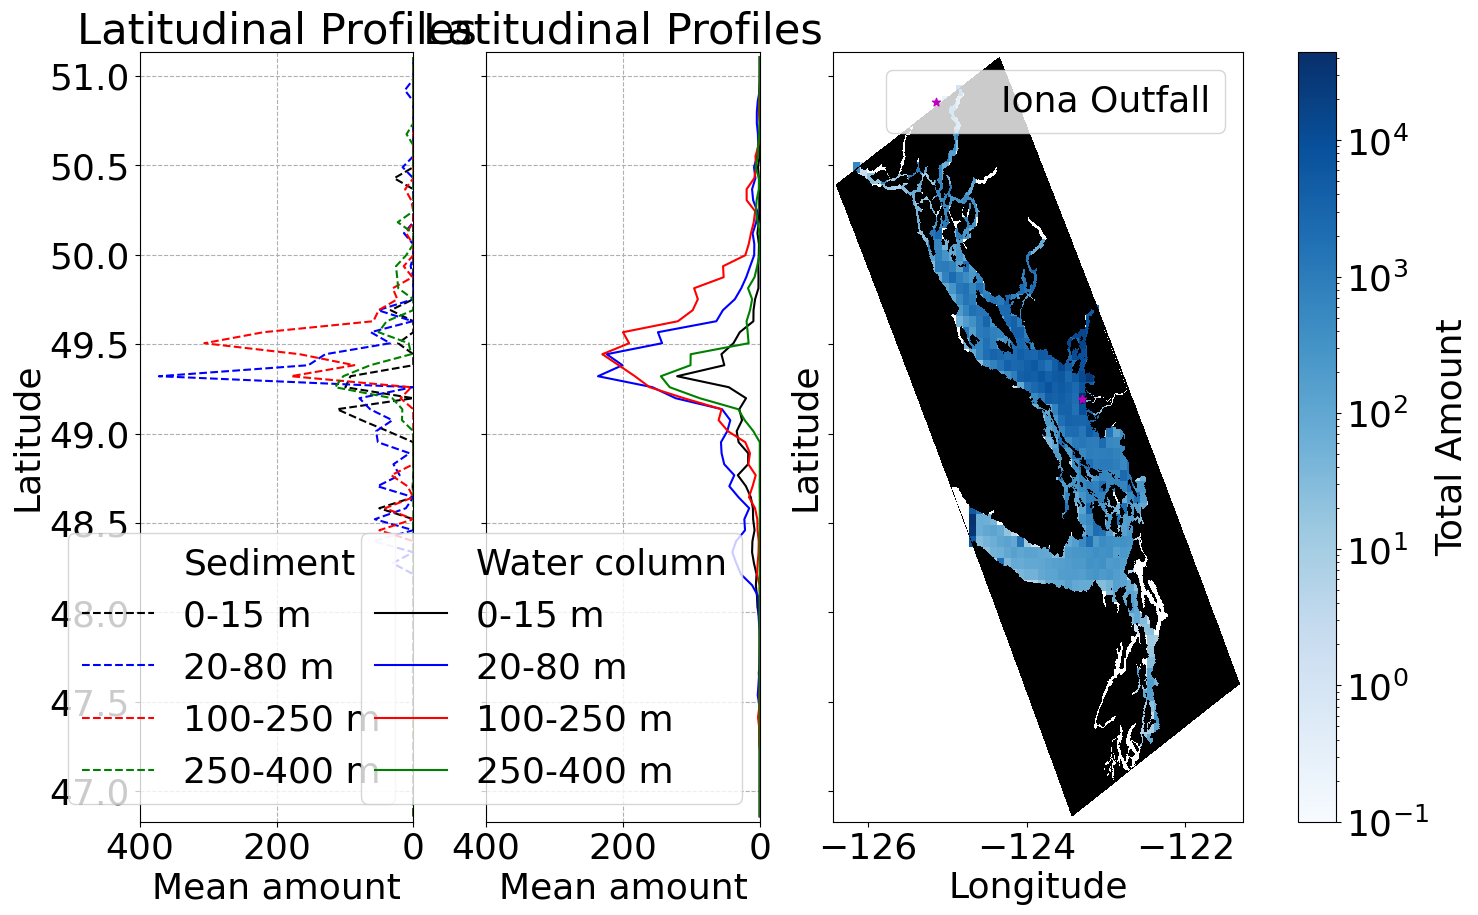

In [111]:
from matplotlib.lines import Line2D

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(16, 10), sharey=True, gridspec_kw={'width_ratios': [1, 1, 2]})

# Left plot: pcolormesh
c_t = ax3.pcolormesh(longitudes, latitudes, total_depth.T, cmap='Blues', norm=norm)
ax3.pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0][0], cmap=cmap)
ax3.scatter(clon, clat, c='m', marker='*', label='Iona Outfall')

# Colorbar below both axes
cb_t = fig.colorbar(c_t, ax=ax3, label="Total Amount", orientation='vertical', pad=0.1)

# Ax1 config
ax3.set_ylabel('Latitude')
ax3.set_xlabel('Longitude')
ax3.legend()

# Right plot: line plot
ax2.plot(concentration_water[labels[0]].mean(), latitudes, '-k',label=labels[0])
ax2.plot(concentration_water[labels[1]].mean(),latitudes, '-b',label=labels[1])
ax2.plot(concentration_water[labels[2]].mean(),latitudes, '-r',label=labels[2])
ax2.plot(concentration_water[labels[3]].mean(),latitudes, '-g', label=labels[3])
ax2.invert_xaxis()
ax2.grid(linestyle='--')
ax2.set_xlabel('Mean amount')
ax2.set_title("Latitudinal Profiles")
#
legend_elements_x2 = [
    Line2D([0], [0], color='k', lw=0, label='Water column'),  # "title" for first section
    Line2D([0], [0], color='k', linestyle='-', label=labels[0]),
    Line2D([0], [0], color='b', linestyle='-', label=labels[1]),
    Line2D([0], [0], color='r', linestyle='-', label=labels[2]),
    Line2D([0], [0], color='g', linestyle='-', label=labels[3])
]
ax2.legend(handles=legend_elements_x2, frameon=True)

#
ax1.plot(concentration_sediment[labels[0]].mean(), latitudes, '--k',label=labels[0])
ax1.plot(concentration_sediment[labels[1]].mean(),latitudes, '--b',label=labels[1])
ax1.plot(concentration_sediment[labels[2]].mean(),latitudes, '--r',label=labels[2])
ax1.plot(concentration_sediment[labels[3]].mean(),latitudes, '--g', label=labels[3])
#
ax1.invert_xaxis()
ax1.grid(linestyle='--')
ax1.set_xlabel('Mean amount')
ax1.set_ylabel('Latitude')
ax1.set_title("Latitudinal Profiles")
#
legend_elements_x1 = [Line2D([0], [0], color='k', lw=0, label='Sediment'),  # "title" for second section
    Line2D([0], [0], color='k', linestyle='--', label=labels[0]),
    Line2D([0], [0], color='b', linestyle='--', label=labels[1]),
    Line2D([0], [0], color='r', linestyle='--', label=labels[2]),
    Line2D([0], [0], color='g', linestyle='--', label=labels[3])
]

# Add to ax2
ax1.legend(handles=legend_elements_x1, frameon=True)
#
ax2.set_xlim([400, 0])
ax1.set_xlim([400, 0])
#plt.tight_layout()
plt.show()
